# **GA-FELCM VS FIXED-θ FELCM**

GA-FELCM: best θ per client (searched)
Fixed-θ FELCM: same θ for all (no search)

/usr/local/lib/python3.12/dist-packages/torch/backends/__init__.py:46: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  self.setter(val)


COLAB: TRUE FL + FIXED-θ FELCM + PVTv2-B2 (FUSION) — 6 Clients (3+3) | AUG=ON
DEVICE: cuda | torch=2.9.0+cu126

STEP 0: DOWNLOAD DATASETS VIA kagglehub


100%|██████████| 130M/130M [00:00<00:00, 201MB/s]

Extracting files...


✅ DS2 downloaded to: /root/.cache/kagglehub/datasets/yassinebazgour/preprocessed-brain-mri-scans-for-tumors-detection/versions/1
Using Colab cache for faster access to the 'pmram-bangladeshi-brain-cancer-mri-dataset' dataset.
✅ DS1 downloaded to: /kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset

STEP 1: LOCATE DATASET ROOTS (NO MERGE)
Dataset-1 RAW root detected:
  /kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/Raw Data/Raw
Dataset-2 root detected:
  /root/.cache/kagglehub/datasets/yassinebazgour/preprocessed-brain-mri-scans-for-tumors-detection/versions/1/preprocessed_brain_mri_dataset

--------------------------------------------------------------------------------------------
Building Dataset-1 (RAW only)
ds1_raw: 512Glioma -> glioma | 373 images
ds1_raw: 512Meningioma -> meningioma | 363 images
ds1_raw: 512Normal -> notumor | 396 images
ds1_raw: 512Pituitary -> pituitary | 37

path_overlap_train_val  path_overlap_train_test  path_overlap_val_test  \
0                       0                        0                      0   

   unique_paths_train  unique_paths_val  unique_paths_test  \
0                1053               226                226   

   filename_overlap_train_val  filename_overlap_train_test  \
0                           0                            0   

   filename_overlap_val_test  subset_hash_train_val  subset_hash_train_test  \
0                          0                      5                       5   

   subset_hash_val_test  subset_hash_n_train  subset_hash_n_val  \
0                     6                  298                222   

   subset_hash_n_test  
0                 224


--------------------------------------------------------------------------------------------
Leakage / Sanity Summary — ds2
--------------------------------------------------------------------------------------------


path_overlap_train_val  path_overlap_train_test  path_overlap_val_test  \
0                       0                        0                      0   

   unique_paths_train  unique_paths_val  unique_paths_test  \
0                4921              1055               1055   

   filename_overlap_train_val  filename_overlap_train_test  \
0                           0                            0   

   filename_overlap_val_test  subset_hash_train_val  subset_hash_train_test  \
0                          0                      3                       3   

   subset_hash_val_test  subset_hash_n_train  subset_hash_n_val  \
0                     3                  298                299   

   subset_hash_n_test  
0                 298


STEP 3: NON-IID CLIENT PARTITIONING (3 clients per dataset => 6 total)
DS1 Client 0 (global id 0): 490 train, 77 tune, 67 val
DS1 Client 1 (global id 1): 125 train, 20 tune, 18 val
DS1 Client 2 (global id 2): 198 train, 31 tune, 27 val
DS2 Client 0 (global id 3): 629 train, 98 tune, 86 val
DS2 Client 1 (global id 4): 527 train, 82 tune, 72 val
DS2 Client 2 (global id 5): 2653 train, 412 tune, 362 val

--------------------------------------------------------------------------------------------
Client class distribution (Non-IID, per dataset)
--------------------------------------------------------------------------------------------


client dataset  total_train  total_tune  total_val  glioma  meningioma  \
0  client_0     ds1          490          77         67     111          46   
1  client_1     ds1          125          20         18      75           4   
2  client_2     ds1          198          31         27      16         147   
3  client_3     ds2          629          98         86      12         197   
4  client_4     ds2          527          82         72     202           4   
5  client_5     ds2         2653         412        362     665         691   

   notumor  pituitary  
0      176        157  
1        8         38  
2       30          5  
3      416          4  
4      284         37  
5      383        914


STEP 4: DATA LOADERS (AUG ON) + IMAGENET NORM
Augmentation: ON ✅
Preprocessing: ON ✅
GA: OFF ✅ (Fixed θ)
Fixed θ = (1.0, 0.35, 6.0, 2.5, 7, 0.1, 0.05)

--------------------------------------------------------------------------------------------
AUGMENTATION VISUAL CHECK (Before vs After) — WITH CLASS NAMES
--------------------------------------------------------------------------------------------


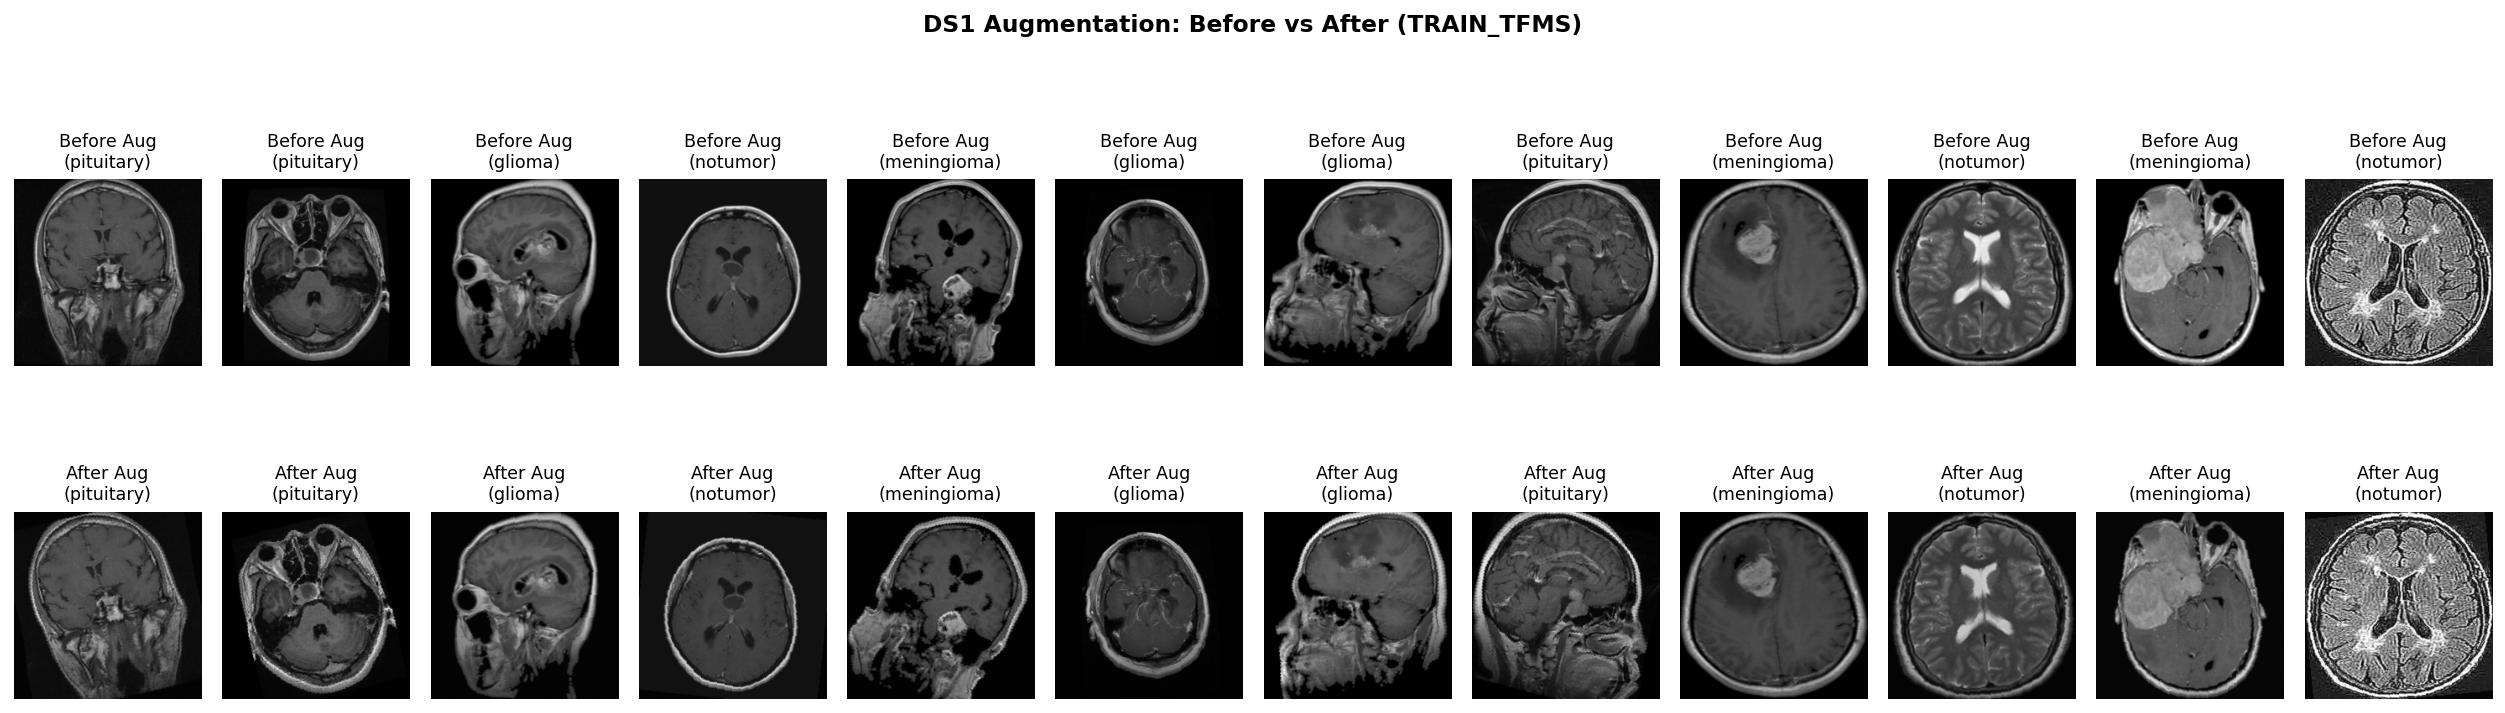

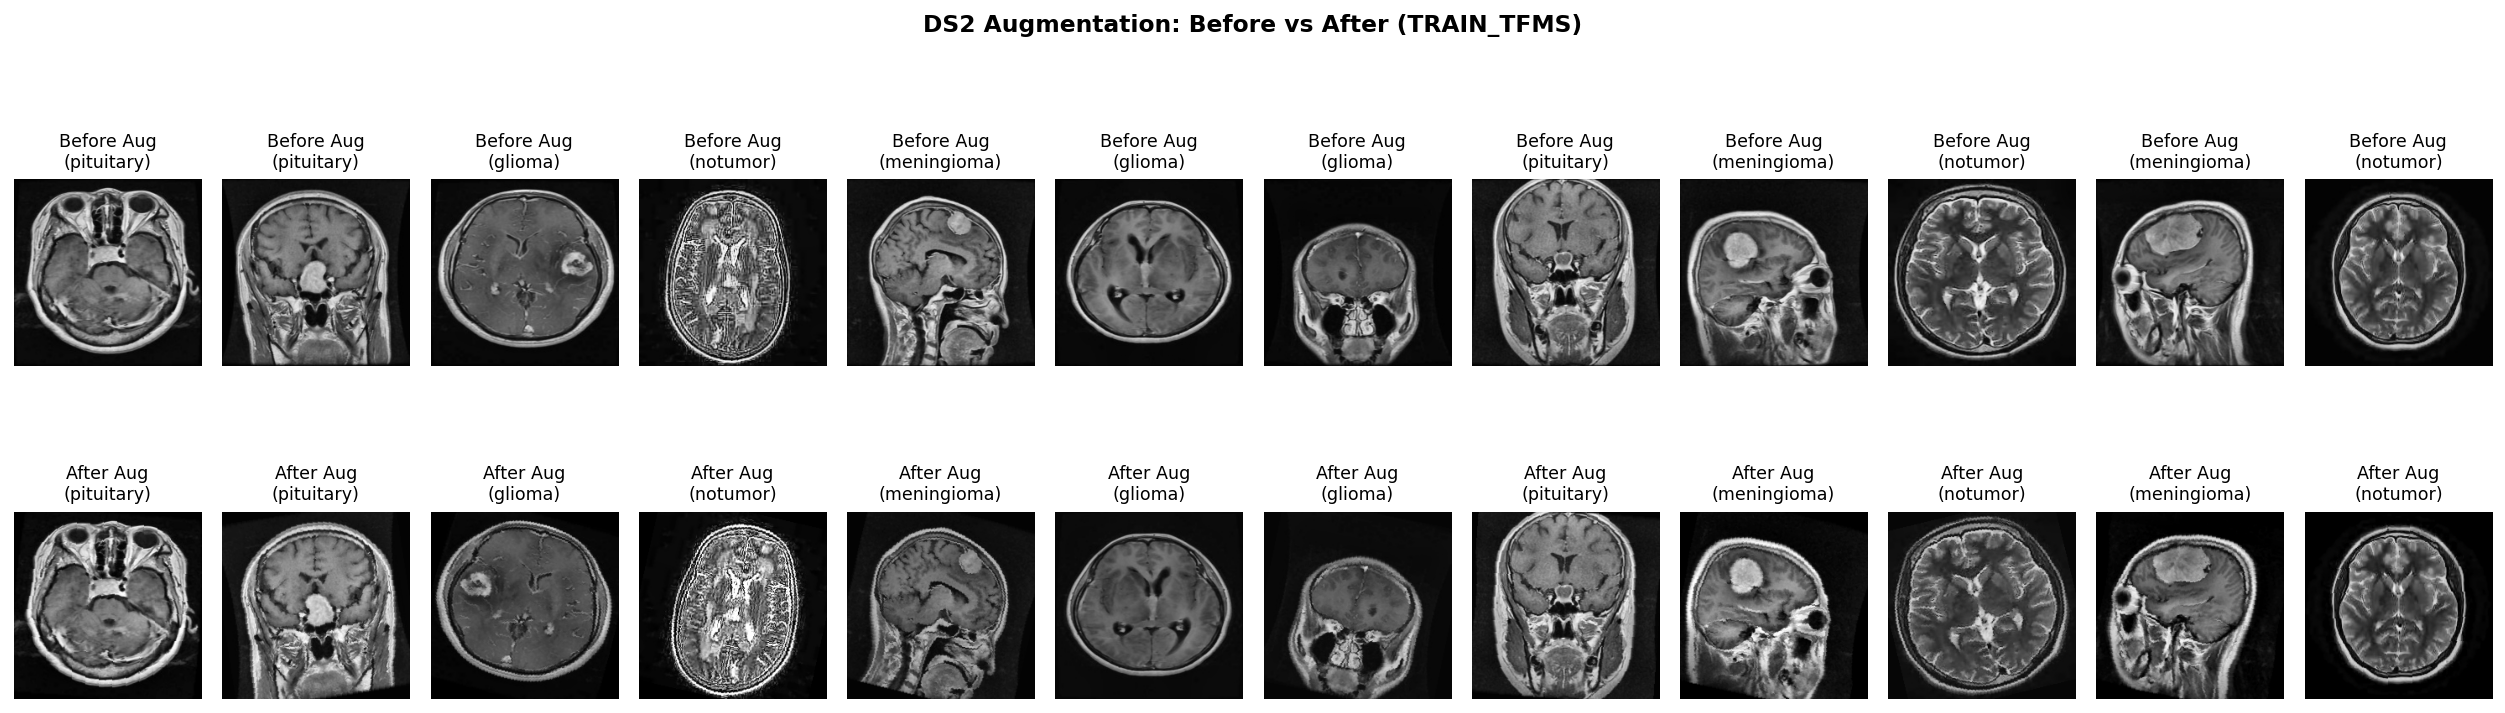


STEP 5: FIXED-θ ENHANCED FELCM PREPROCESSOR (NO GA)
Fixed θ fullform mapping: {'gamma': 'Power transform exponent (γ)', 'alpha': 'Local contrast weight (α)', 'beta': 'Contrast sharpness (β)', 'tau': 'Robust clipping threshold (τ)', 'k': 'Blur kernel size (k) for local contrast map', 'sh': 'Sharpen strength (sh)', 'dn': 'Denoise strength (dn)'}
Fixed θ: (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, dn=0.05)

STEP 6: MODEL (PVTv2-B2 + MULTI-SCALE FUSION)

STEP 7: TRAIN / EVAL UTILITIES (FULL METRICS)

STEP 8: INITIALIZING GLOBAL MODEL


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/101M [00:00<?, ?B/s]


--------------------------------------------------------------------------------------------
Backbone: pvt_v2_b2 | pretrained_loaded=True
Total params: 25,989,002 | Trainable params: 1,139,146 (4.38%)
--------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------
Hyperparameters / Fixed θ
--------------------------------------------------------------------------------------------


hp_name  \
0           clients_per_dataset   
1                 clients_total   
2                        rounds   
3                  local_epochs   
4                            lr   
5                  weight_decay   
6                 warmup_epochs   
7               label_smoothing   
8                     grad_clip   
9                    fedprox_mu   
10                     img_size   
11                   batch_size   
12                  num_workers   
13              global_val_frac   
14                    test_frac   
15              client_val_frac   
16             client_tune_frac   
17     min_per_class_per_client   
18              dirichlet_alpha   
19            use_preprocessing   
20                       use_ga   
21                  fixed_theta   
22             use_augmentation   
23                     cond_dim   
24                 head_dropout   
25         unfreeze_after_round   
26             unfreeze_lr_mult   
27           unfreeze_tail_frac   
28  quick_hash_subset_per_split   
29         preproc_val_sample_n   
30               before_after_n   
31                   make_plots   
32                     ds1_base   
33                     ds2_base   
34              fixed_theta_str   
35              theta_fullforms   
36                backbone_name   
37                         norm   

                                             hp_value  
0                                                   3  
1                                                   6  
2                                                  12  
3                                                   2  
4                                               0.001  
5                                              0.0005  
6                                                   1  
7                                                0.08  
8                                                 1.0  
9                                                0.01  
10                                                224  
11                                                 20  
12                                                  2  
13                                               0.15  
14                                               0.15  
15                                               0.12  
16                                               0.12  
17                                                  5  
18                                               0.35  
19                                               True  
20                                              False  
21                (1.0, 0.35, 6.0, 2.5, 7, 0.1, 0.05)  
22                                               True  
23                                                128  
24                                                0.3  
25                                                  3  
26                                                0.1  
27                                               0.17  
28                                                300  
29                                                500  
30                                                 12  
31                                               True  
32  /kaggle/input/pmram-bangladeshi-brain-cancer-m...  
33  /root/.cache/kagglehub/datasets/yassinebazgour...  
34  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...  
35  {'gamma': 'Power transform exponent (γ)', 'alp...  
36                                          pvt_v2_b2  
37                                  ImageNet mean/std


STEP 9: FEDERATED TRAINING (FIXED θ, NO GA)
Rounds: 12 | Clients: 6 | Local epochs: 2
LR=0.001 | label_smoothing=0.08 | grad_clip=1.0 | FedProx μ=0.01
Fixed θ (ALL clients): (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, dn=0.05)
Unfreeze after round: 3 | tail frac: 0.17 | bb lr mult: 0.1

ROUND 1/12
Client 0 (ds1) | train_acc=0.5612 | val_acc=0.8209 | val_prec=0.7540 | val_rec=0.7616 | val_f1=0.7368 | val_auc=0.9579 | val_logloss=0.4779 | time(train=30.0s, eval=7.9s) | theta=(γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, dn=0.05)
Client 1 (ds1) | train_acc=0.3560 | val_acc=0.3333 | val_prec=0.1667 | val_rec=0.2500 | val_f1=0.2000 | val_auc=nan | val_logloss=1.3406 | time(train=8.7s, eval=5.7s) | theta=(γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, dn=0.05)
Client 2 (ds1) | train_acc=0.5530 | val_acc=0.8519 | val_prec=0.7159 | val_rec=0.6750 | val_f1=0.6905 | val_auc=0.8783 | val_logloss=0.7120 | time(train=14.3s, eval=0.7s) | theta=(γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, dn=0.05)
Clie

round  round_time_s                                   global_theta_ds1  \
0       1    210.013524  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...   
1       2    132.050587  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...   
2       3    155.438628  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...   
3       4    141.236099  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...   
4       5    141.873978  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...   
5       6    142.631705  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...   
6       7    141.871313  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...   
7       8    141.310639  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...   
8       9    142.068089  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...   
9      10    141.236834  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...   
10     11    140.735830  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...   
11     12    140.792641  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...   

                                     global_theta_ds2  global_acc  \
0   (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...    0.879747   
1   (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...    0.906646   
2   (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...    0.943038   
3   (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...    0.952532   
4   (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...    0.968354   
5   (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...    0.963608   
6   (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...    0.971519   
7   (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...    0.971519   
8   (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...    0.969937   
9   (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...    0.979430   
10  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...    0.976266   
11  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...    0.976266   

    global_f1_macro  global_precision_macro  global_recall_macro  \
0          0.772415                0.773734             0.777097   
1          0.840492                0.838049             0.870888   
2          0.903192                0.898601             0.934965   
3          0.936769                0.937395             0.947008   
4          0.947136                0.952334             0.951609   
5          0.951394                0.952299             0.955126   
6          0.951696                0.952158             0.960743   
7          0.927620                0.926238             0.938717   
8          0.946097                0.938638             0.966596   
9          0.953185                0.945324             0.976966   
10         0.965125                0.970827             0.962952   
11         0.961017                0.961201             0.971015   

    global_log_loss  global_loss_ce  global_eval_time_s  
0          0.344736        0.338708            6.032639  
1          0.286201        0.278527            2.946008  
2          0.188848        0.183301            2.941611  
3          0.175058        0.179886            2.934629  
4          0.151802        0.146129            2.935773  
5          0.149712        0.143526            2.938263  
6          0.142226        0.146101            2.940386  
7          0.136928        0.131246            2.948628  
8          0.135764        0.131297            2.938330  
9          0.107292        0.107477            2.934254  
10         0.128877        0.129824            2.932347  
11         0.128292        0.128264            2.954437


--------------------------------------------------------------------------------------------
LOCAL per-client per-round metrics
--------------------------------------------------------------------------------------------


round    client dataset  ga_best_fit_score  ga_time_s  \
0       1  client_0     ds1                0.0        0.0   
1       1  client_1     ds1                0.0        0.0   
2       1  client_2     ds1                0.0        0.0   
3       1  client_3     ds2                0.0        0.0   
4       1  client_4     ds2                0.0        0.0   
..    ...       ...     ...                ...        ...   
67     12  client_1     ds1                0.0        0.0   
68     12  client_2     ds1                0.0        0.0   
69     12  client_3     ds2                0.0        0.0   
70     12  client_4     ds2                0.0        0.0   
71     12  client_5     ds2                0.0        0.0   

                                            theta_str  gamma_power  \
0   (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...          1.0   
1   (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...          1.0   
2   (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...          1.0   
3   (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...          1.0   
4   (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...          1.0   
..                                                ...          ...   
67  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...          1.0   
68  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...          1.0   
69  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...          1.0   
70  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...          1.0   
71  (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, d...          1.0   

    alpha_contrast_weight  beta_contrast_sharpness  tau_clip  ...  \
0                    0.35                      6.0       2.5  ...   
1                    0.35                      6.0       2.5  ...   
2                    0.35                      6.0       2.5  ...   
3                    0.35                      6.0       2.5  ...   
4                    0.35                      6.0       2.5  ...   
..                    ...                      ...       ...  ...   
67                   0.35                      6.0       2.5  ...   
68                   0.35                      6.0       2.5  ...   
69                   0.35                      6.0       2.5  ...   
70                   0.35                      6.0       2.5  ...   
71                   0.35                      6.0       2.5  ...   

    val_g2_mean  val_g2_entropy_mean  val_g2_mean_c0  val_g2_entropy_c0  \
0      0.488819             0.942505        0.488819           0.942505   
1      0.484363             0.944262        0.484363           0.944262   
2      0.479237             0.943542        0.479237           0.943542   
3      0.517169             0.950874        0.517169           0.950874   
4      0.505217             0.943085        0.505217           0.943085   
..          ...                  ...             ...                ...   
67     0.479780             0.940917        0.479780           0.940917   
68     0.479172             0.942679        0.479172           0.942679   
69     0.509836             0.950288        0.509836           0.950288   
70     0.499570             0.945007        0.499570           0.945007   
71     0.486420             0.947147        0.486420           0.947147   

    val_g2_mean_c1  val_g2_entropy_c1  val_g2_mean_c2  val_g2_entropy_c2  \
0         0.488819           0.942505        0.488819           0.942505   
1              NaN                NaN        0.484363           0.944262   
2         0.479237           0.943542        0.479237           0.943542   
3         0.517169           0.950874        0.517169           0.950874   
4              NaN                NaN        0.505217           0.943085   
..             ...                ...             ...                ...   
67             NaN                NaN        0.479780           0.940917   
68        0.479172           0.942679        0.479172           0.942679   
69        0.5098


STEP 10: FINAL EVALUATION (FEDERATED VAL + TEST)

--------------------------------------------------------------------------------------------
VAL+TEST tables (federated, per-dataset + global)
--------------------------------------------------------------------------------------------


setting split           dataset       acc  \
0  Fixed-θ FELCM (same θ all clients)   VAL  ds1+ds2 weighted  0.974684   
1  Fixed-θ FELCM (same θ all clients)  TEST               ds1  0.977876   
2  Fixed-θ FELCM (same θ all clients)  TEST               ds2  0.977251   
3  Fixed-θ FELCM (same θ all clients)  TEST   global weighted  0.977361   

   precision_macro  recall_macro  f1_macro  precision_weighted  \
0         0.932295      0.945630  0.933904            0.981628   
1         0.981233      0.977571  0.978743            0.979039   
2         0.976615      0.977300  0.976752            0.977810   
3         0.977430      0.977348  0.977103            0.978027   

   recall_weighted  f1_weighted  log_loss  auc_roc_macro_ovr   loss_ce  \
0         0.974684     0.977170  0.120794                NaN  0.121531   
1         0.977876     0.977789  0.123356           0.999298  0.119699   
2         0.977251     0.977331  0.135624           0.994204  0.135428   
3         0.977361     0.977412  0.133460           0.995103  0.132653   

   eval_time_s  
0     2.929997  
1     3.678405  
2     5.477238  
3     5.159879


Paper selection summary:
- Best round (by federated VAL accuracy): round=10 | best_val_acc=0.9794
- Fixed θ ds1: (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, dn=0.05)
- Fixed θ ds2: (γ=1.00, α=0.35, β=6.0, τ=2.5, k=7, sh=0.10, dn=0.05)

STEP 11: PREPROCESSING VALIDATION (DS1 VAL SAMPLE)

--------------------------------------------------------------------------------------------
Preprocessing validation summary (DS1 VAL sample)
--------------------------------------------------------------------------------------------


metric      mean       std       min       max
0  edge_energy_before  0.041596  0.021720  0.014947  0.165471
1   edge_energy_after  0.108787  0.023739  0.070939  0.227207
2      entropy_before  5.820408  0.628255  3.547314  7.239670
3       entropy_after  6.481022  0.578069  3.841960  7.485405
4     contrast_before  0.187640  0.052597  0.101468  0.363759
5      contrast_after  0.246638  0.023723  0.194833  0.332247
6     edge_gain_ratio  2.887079  0.773562  1.181834  5.707904
7       entropy_delta  0.660614  0.264214  0.172798  1.532980
8      contrast_delta  0.058997  0.039349 -0.031512  0.143331


STEP 12: BEFORE vs AFTER PREPROCESSING IMAGES (FIXED θ) — PRINTED


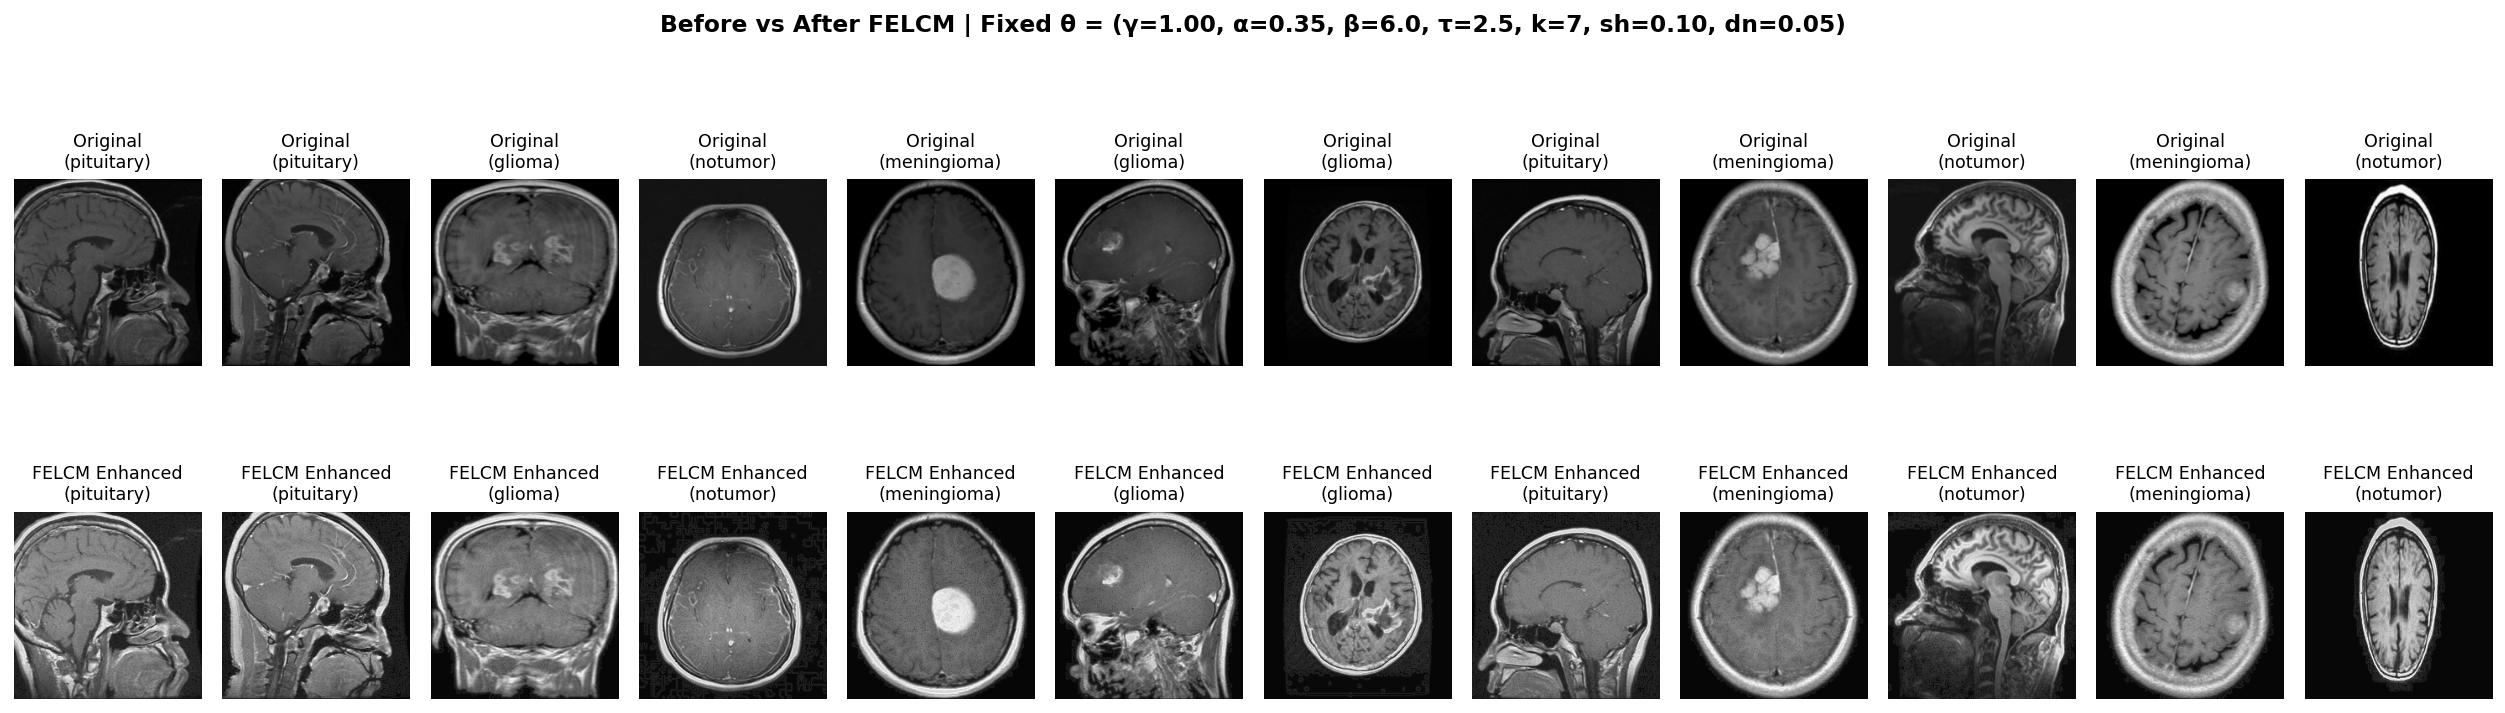


STEP 13: ROC + PR CURVES (TEST, Fixed θ) — DS1


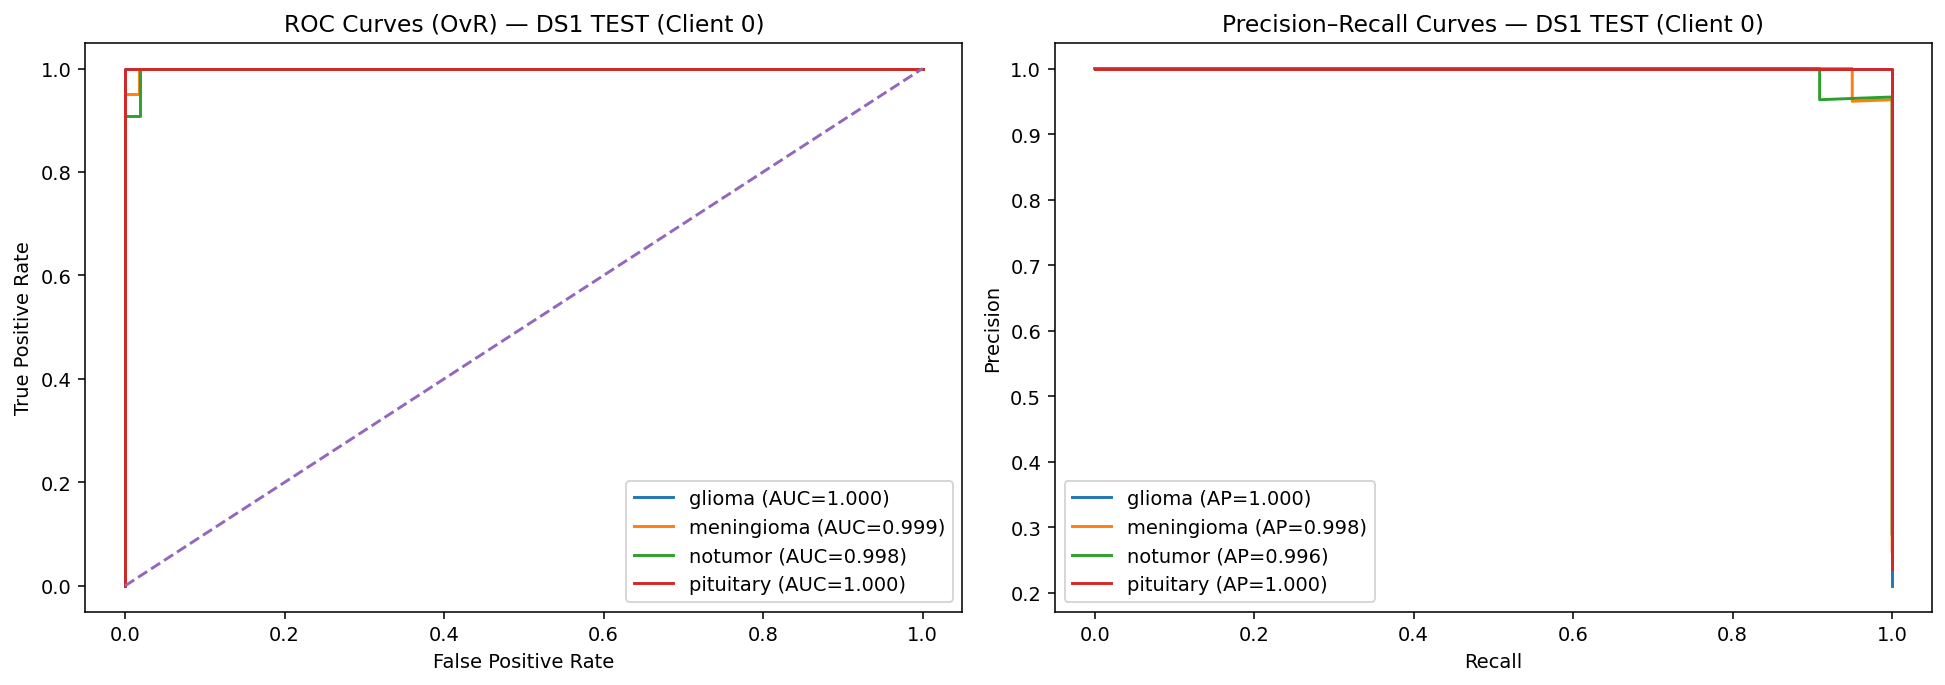


STEP 14: CONFUSION MATRIX (TEST, Fixed θ) — DS1


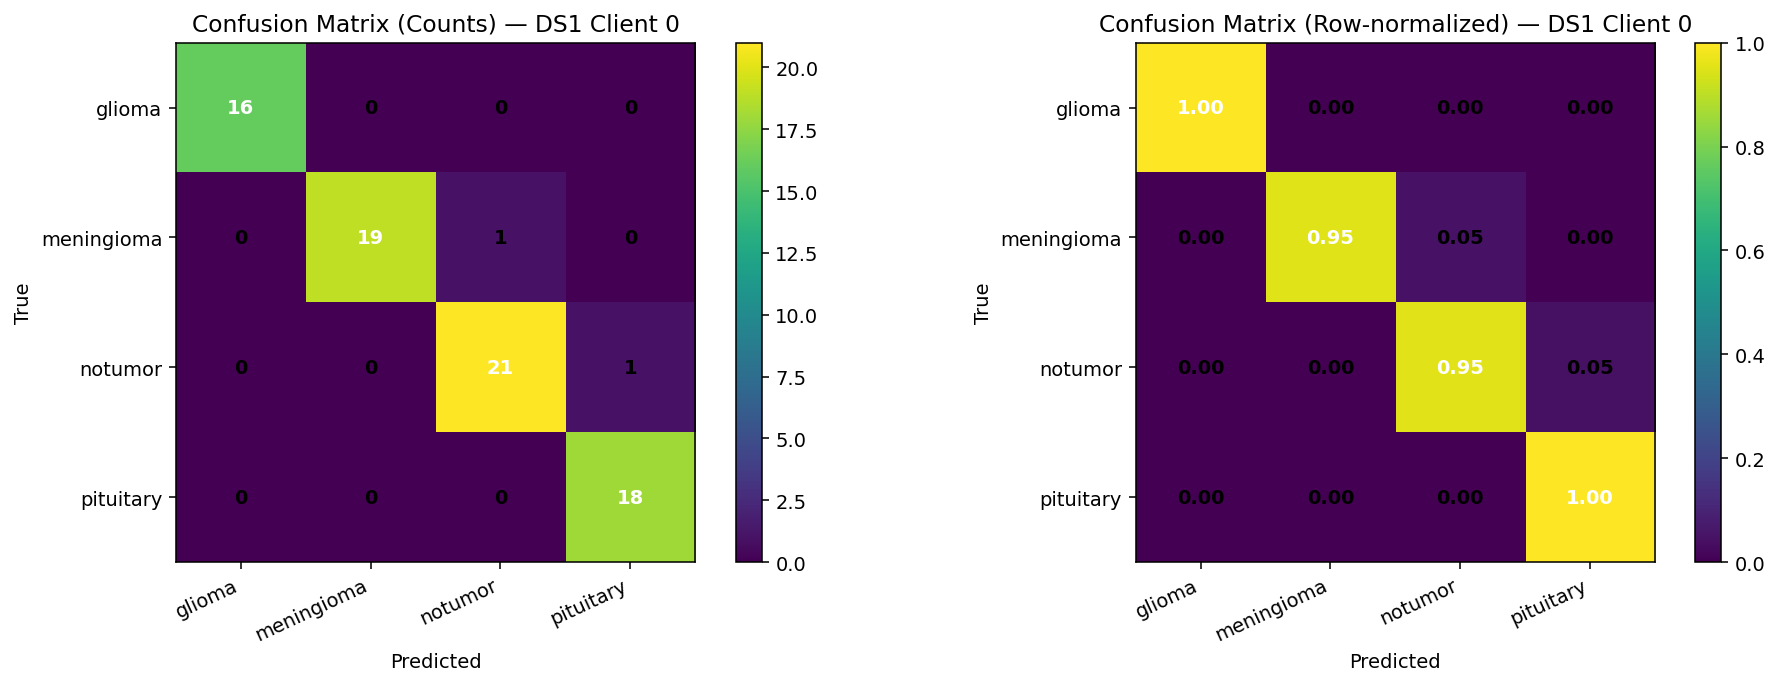


STEP 15: CALIBRATION PLOT (TEST, Fixed θ) — DS1


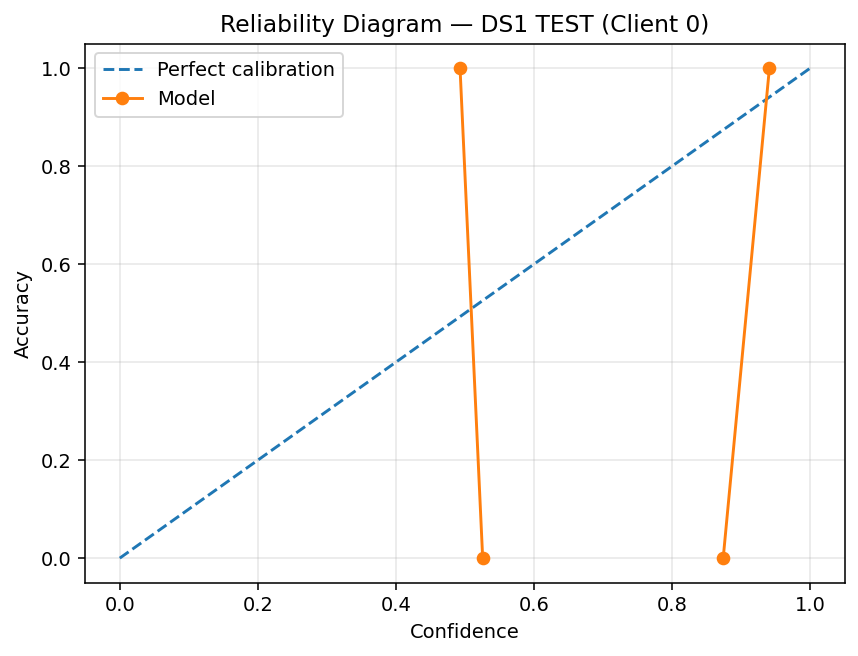


--------------------------------------------------------------------------------------------
Calibration bins table (DS1)
--------------------------------------------------------------------------------------------


bin_confidence  bin_accuracy  bin_count
0              NaN           NaN          0
1              NaN           NaN          0
2              NaN           NaN          0
3              NaN           NaN          0
4              NaN           NaN          0
5         0.492787           1.0          1
6         0.525577           0.0          1
7              NaN           NaN          0
8              NaN           NaN          0
9              NaN           NaN          0
10        0.873926           0.0          1
11        0.940847           1.0         73


STEP 16: UNIQUE PLOTS (RADAR, CLIENT EVOLUTION, THETA TABLE)


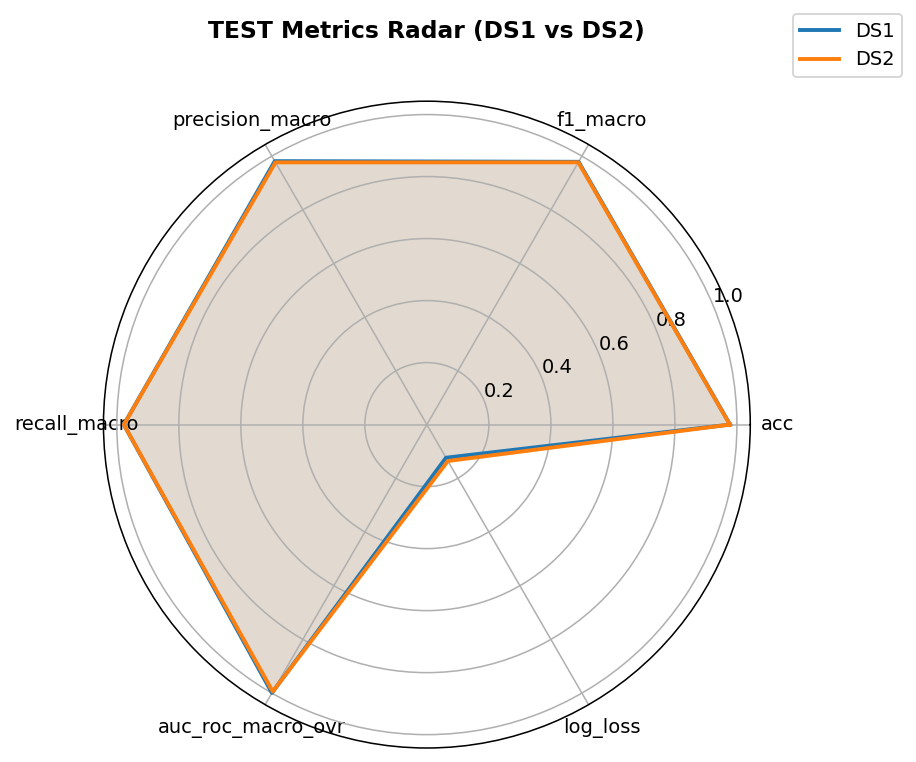

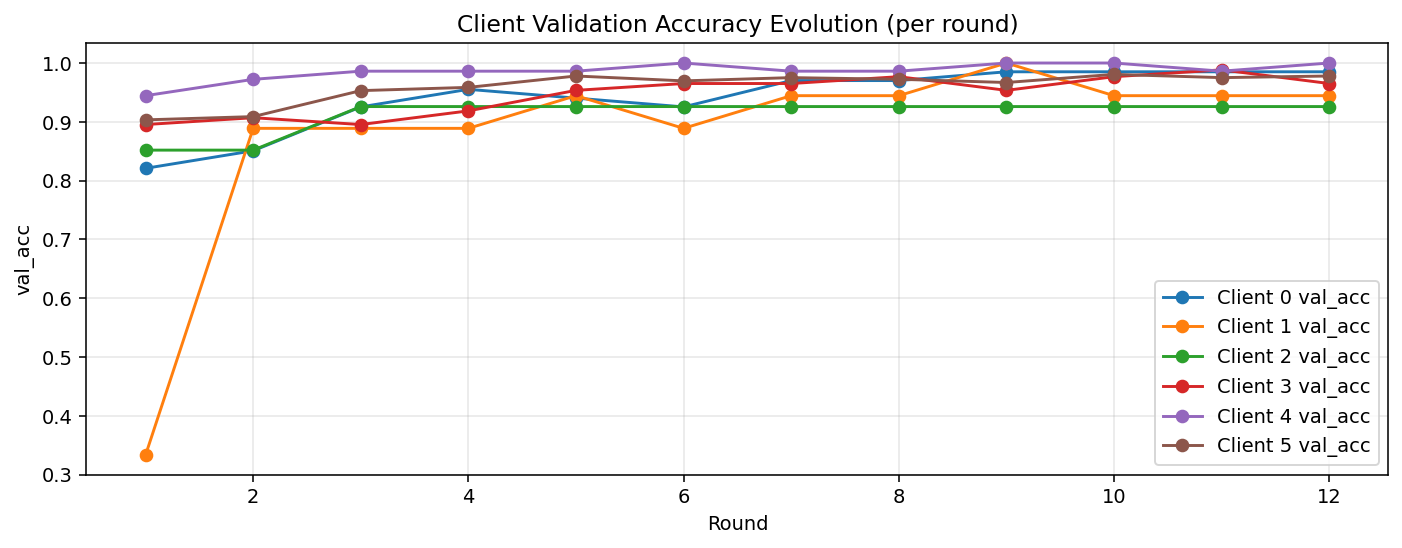


--------------------------------------------------------------------------------------------
Mean θ parameters over rounds (clients averaged) — Fixed θ (should be flat)
--------------------------------------------------------------------------------------------


round  gamma_power  alpha_contrast_weight  beta_contrast_sharpness  \
0       1          1.0                   0.35                      6.0   
1       2          1.0                   0.35                      6.0   
2       3          1.0                   0.35                      6.0   
3       4          1.0                   0.35                      6.0   
4       5          1.0                   0.35                      6.0   
5       6          1.0                   0.35                      6.0   
6       7          1.0                   0.35                      6.0   
7       8          1.0                   0.35                      6.0   
8       9          1.0                   0.35                      6.0   
9      10          1.0                   0.35                      6.0   
10     11          1.0                   0.35                      6.0   
11     12          1.0                   0.35                      6.0   

    tau_clip  k_blur_kernel_size  sh_sharpen_strength  dn_denoise_strength  
0        2.5                 7.0                  0.1                 0.05  
1        2.5                 7.0                  0.1                 0.05  
2        2.5                 7.0                  0.1                 0.05  
3        2.5                 7.0                  0.1                 0.05  
4        2.5                 7.0                  0.1                 0.05  
5        2.5                 7.0                  0.1                 0.05  
6        2.5                 7.0                  0.1                 0.05  
7        2.5                 7.0                  0.1                 0.05  
8        2.5                 7.0                  0.1                 0.05  
9        2.5                 7.0                  0.1                 0.05  
10       2.5                 7.0                  0.1                 0.05  
11       2.5                 7.0                  0.1                 0.05


STEP 17: SAVING ONLY TWO FILES (CHECKPOINT + ONE CSV)
✅ Saved checkpoint: /content/outputs/FL_FIXEDTHETA_FELCM_PVTv2B2_FUSION_checkpoint.pth
✅ Saved CSV (ALL outputs): /content/outputs/ALL_OUTPUTS_AND_METRICS.csv

DONE ✅ (TRUE FL SIMULATION, 6 clients (3+3), rounds=12, FIXED-θ FELCM, Augmentation, Fusion, PVTv2-B2 + plots)


In [1]:
# ============================================================
# COLAB FULL SCRIPT (kagglehub download)
# TRUE FL + FIXED-θ FELCM + PVTv2-B2 (FUSION) — 6 Clients (3+3)
# Preprocessing ON (FIXED θ) + Augmentation ON + Fusion ON
# (GA is DISABLED; same hand-picked θ for every client, every round)
#
# EXTRA OUTPUTS:
#  - Augmentation Before vs After (WITH CLASS NAMES)
#  - ROC + PR Curves (TEST) — DS1 (one test client)
#  - Confusion Matrix (counts + row-normalized) — DS1
#  - Calibration / Reliability diagram — DS1
#  - Radar (DS1 vs DS2), Client val_acc evolution, Theta "evolution" (flat)
# Saves: checkpoint + one CSV (ALL outputs)
# ============================================================

import os, time, math, random, sys, subprocess, hashlib
from typing import List

import numpy as np
import pandas as pd
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    log_loss, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, average_precision_score
)

# -------------------------
# Install deps (Colab)
# -------------------------
def pip_install(pkg):
    subprocess.check_call([sys.executable, "-m", "pip", "-q", "install", pkg])

try:
    import timm
except Exception:
    pip_install("timm")
    import timm

try:
    import kagglehub
except Exception:
    pip_install("kagglehub")
    import kagglehub

from torchvision import transforms

try:
    from IPython.display import display
except Exception:
    display = print

# -------------------------
# Reproducibility + Device
# -------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if DEVICE.type == "cuda":
    torch.backends.cudnn.benchmark = True
    torch.backends.cudnn.deterministic = False
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True
try:
    torch.set_float32_matmul_precision("high")
except Exception:
    pass

plt.rcParams["figure.dpi"] = 140

print("=" * 92)
print("COLAB: TRUE FL + FIXED-θ FELCM + PVTv2-B2 (FUSION) — 6 Clients (3+3) | AUG=ON")
print("=" * 92)
print(f"DEVICE: {DEVICE} | torch={torch.__version__}")
print("=" * 92)

# -------------------------
# Configuration
# -------------------------
CFG = {
    # FL: 3 clients per dataset => total 6
    "clients_per_dataset": 3,
    "clients_total": 6,

    # IMPORTANT: rounds = 12
    "rounds": 12,
    "local_epochs": 2,
    "lr": 1e-3,
    "weight_decay": 5e-4,
    "warmup_epochs": 1,
    "label_smoothing": 0.08,
    "grad_clip": 1.0,
    "fedprox_mu": 0.01,

    # image
    "img_size": 224 if torch.cuda.is_available() else 160,
    "batch_size": 20 if torch.cuda.is_available() else 10,
    "num_workers": 2 if torch.cuda.is_available() else 0,

    # split
    "global_val_frac": 0.15,
    "test_frac": 0.15,
    "client_val_frac": 0.12,
    "client_tune_frac": 0.12,  # kept for structure (not used by GA here)
    "min_per_class_per_client": 5,

    # non-iid
    "dirichlet_alpha": 0.35,

    # preprocessing (FIXED θ)
    "use_preprocessing": True,
    "use_ga": False,  # <- IMPORTANT: GA OFF
    # Hand-picked θ (same for ALL clients, ALL rounds)
    # (gamma, alpha, beta, tau, blur_k, sharpen, denoise)
    "fixed_theta": (1.00, 0.35, 6.0, 2.5, 7, 0.10, 0.05),

    # augmentation
    "use_augmentation": True,

    # model conditioning
    "cond_dim": 128,
    "head_dropout": 0.3,

    # optional late unfreeze
    "unfreeze_after_round": 3,
    "unfreeze_lr_mult": 0.10,
    "unfreeze_tail_frac": 0.17,

    # misc
    "quick_hash_subset_per_split": 300,
    "preproc_val_sample_n": 500,
    "before_after_n": 12,
    "make_plots": True,  # set False for faster runs
}

OUTDIR = "/content/outputs"
os.makedirs(OUTDIR, exist_ok=True)
MODEL_PATH = os.path.join(OUTDIR, "FL_FIXEDTHETA_FELCM_PVTv2B2_FUSION_checkpoint.pth")
CSV_PATH   = os.path.join(OUTDIR, "ALL_OUTPUTS_AND_METRICS.csv")

IMG_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp")

IMAGENET_MEAN = torch.tensor([0.485, 0.456, 0.406], device=DEVICE).view(1, 3, 1, 1)
IMAGENET_STD  = torch.tensor([0.229, 0.224, 0.225], device=DEVICE).view(1, 3, 1, 1)

# ============================================================
# Helper: collect all tables into ONE CSV (long format)
# ============================================================
ALL_ROWS = []
def add_table_to_csv(df, table_name):
    df2 = df.copy()
    df2.insert(0, "table_name", table_name)
    for _, row in df2.iterrows():
        ALL_ROWS.append(row.to_dict())

def print_table(df, title):
    print("\n" + "-" * 92)
    print(title)
    print("-" * 92)
    display(df)

# ============================================================
# STEP 0: DOWNLOAD DATASETS VIA kagglehub
# ============================================================
print("\n" + "=" * 92)
print("STEP 0: DOWNLOAD DATASETS VIA kagglehub")
print("=" * 92)

ds2_path = kagglehub.dataset_download("yassinebazgour/preprocessed-brain-mri-scans-for-tumors-detection")
print("✅ DS2 downloaded to:", ds2_path)

ds1_path = kagglehub.dataset_download("orvile/pmram-bangladeshi-brain-cancer-mri-dataset")
print("✅ DS1 downloaded to:", ds1_path)

CFG["ds1_base"] = ds1_path
CFG["ds2_base"] = ds2_path

# ============================================================
# STEP 1: DATASET DISCOVERY (NO CENTRAL MERGE)
# ============================================================
print("\n" + "=" * 92)
print("STEP 1: LOCATE DATASET ROOTS (NO MERGE)")
print("=" * 92)

REQ1 = {"512Glioma", "512Meningioma", "512Normal", "512Pituitary"}
REQ2 = {"glioma", "meningioma", "notumor", "pituitary"}

def norm_label(name: str):
    s = str(name).strip().lower()
    if "glioma" in s: return "glioma"
    if "meningioma" in s: return "meningioma"
    if "pituitary" in s: return "pituitary"
    if "normal" in s or "no_tumor" in s or "no tumor" in s or "notumor" in s: return "notumor"
    return None

def find_root_with_required_class_dirs(base_dir, required_set, prefer_raw=True):
    candidates = []
    for root, dirs, _ in os.walk(base_dir):
        if required_set.issubset(set(dirs)):
            candidates.append(root)
    if not candidates:
        return None

    def score(p):
        pl = p.lower()
        sc = 0
        if prefer_raw:
            if "raw data" in pl: sc += 7
            if os.path.basename(p).lower() == "raw": sc += 7
            if "/raw/" in pl or "\\raw\\" in pl: sc += 3
            if "augmented" in pl: sc -= 20
        sc -= 0.0001 * len(p)
        return sc

    return max(candidates, key=score)

def list_images_under_class_root(class_root, class_dir_name):
    class_dir = os.path.join(class_root, class_dir_name)
    out = []
    for r, _, files in os.walk(class_dir):
        for fn in files:
            if fn.lower().endswith(IMG_EXTS):
                out.append(os.path.join(r, fn))
    return out

def build_df_from_root(ds_root, class_dirs, source_name):
    rows = []
    for c in class_dirs:
        lab = norm_label(c)
        imgs = list_images_under_class_root(ds_root, c)
        print(f"{source_name}: {c} -> {lab} | {len(imgs)} images")
        for p in imgs:
            rows.append({"path": p, "label": lab, "source": source_name})
    dfm = pd.DataFrame(rows).dropna().reset_index(drop=True)
    dfm["path"] = dfm["path"].astype(str)
    dfm["label"] = dfm["label"].astype(str)
    dfm["source"] = dfm["source"].astype(str)
    dfm = dfm.drop_duplicates(subset=["path"]).reset_index(drop=True)
    dfm["filename"] = dfm["path"].apply(lambda x: os.path.basename(x))
    return dfm

DS1_ROOT = find_root_with_required_class_dirs(CFG["ds1_base"], REQ1, prefer_raw=True)
if DS1_ROOT is None:
    raise RuntimeError(f"Could not locate DS1 class root under {CFG['ds1_base']} with dirs {sorted(list(REQ1))}")
print(f"Dataset-1 RAW root detected:\n  {DS1_ROOT}")

DS2_ROOT = find_root_with_required_class_dirs(CFG["ds2_base"], REQ2, prefer_raw=False)
if DS2_ROOT is None:
    raise RuntimeError(f"Could not locate DS2 class root under {CFG['ds2_base']} with dirs {sorted(list(REQ2))}")
print(f"Dataset-2 root detected:\n  {DS2_ROOT}")

print("\n" + "-" * 92)
print("Building Dataset-1 (RAW only)")
df1 = build_df_from_root(DS1_ROOT, ["512Glioma", "512Meningioma", "512Normal", "512Pituitary"], "ds1_raw")
print("Building Dataset-2 (preprocessed)")
df2 = build_df_from_root(DS2_ROOT, ["glioma", "meningioma", "notumor", "pituitary"], "ds2")

labels = ["glioma", "meningioma", "notumor", "pituitary"]
label2id = {l: i for i, l in enumerate(labels)}
id2label = {i: l for l, i in label2id.items()}
NUM_CLASSES = len(labels)

def enforce_labels(df_):
    df_ = df_.copy()
    df_["label"] = df_["label"].astype(str).str.strip().str.lower()
    df_ = df_[df_["label"].isin(set(labels))].reset_index(drop=True)
    df_["y"] = df_["label"].map(label2id).astype(int)
    return df_

df1 = enforce_labels(df1)
df2 = enforce_labels(df2)

print("\n" + "-" * 92)
print(f"Dataset-1 images: {len(df1)}")
print(df1["label"].value_counts().reindex(labels, fill_value=0))
print(f"Dataset-2 images: {len(df2)}")
print(df2["label"].value_counts().reindex(labels, fill_value=0))
print("-" * 92)

# ============================================================
# STEP 2: Train/Val/Test Split per Dataset (STRATIFIED)
# ============================================================
print("\n" + "=" * 92)
print("STEP 2: TRAIN/VAL/TEST SPLIT (PER DATASET)")
print("=" * 92)

def split_dataset(df_):
    train_df, temp_df = train_test_split(
        df_,
        test_size=(CFG["global_val_frac"] + CFG["test_frac"]),
        stratify=df_["y"],
        random_state=SEED,
    )
    val_rel = CFG["global_val_frac"] / (CFG["global_val_frac"] + CFG["test_frac"])
    val_df, test_df = train_test_split(
        temp_df,
        test_size=(1 - val_rel),
        stratify=temp_df["y"],
        random_state=SEED,
    )
    return train_df.reset_index(drop=True), val_df.reset_index(drop=True), test_df.reset_index(drop=True)

train1, val1, test1 = split_dataset(df1)
train2, val2, test2 = split_dataset(df2)

print(f"DS1 TRAIN: {len(train1)} | VAL: {len(val1)} | TEST: {len(test1)}")
print(f"DS2 TRAIN: {len(train2)} | VAL: {len(val2)} | TEST: {len(test2)}")

# ============================================================
# STEP 2.5: Leakage/Sanity Checks (per dataset)
# ============================================================
print("\n" + "=" * 92)
print("STEP 2.5: SANITY / LEAKAGE CHECKS (PER DATASET)")
print("=" * 92)

def split_overlap_checks(train_df, val_df, test_df):
    tr = set(train_df["path"].tolist())
    va = set(val_df["path"].tolist())
    te = set(test_df["path"].tolist())
    checks = {
        "path_overlap_train_val": len(tr.intersection(va)),
        "path_overlap_train_test": len(tr.intersection(te)),
        "path_overlap_val_test": len(va.intersection(te)),
        "unique_paths_train": len(tr),
        "unique_paths_val": len(va),
        "unique_paths_test": len(te),
    }
    trf = set(train_df["filename"].tolist())
    vaf = set(val_df["filename"].tolist())
    tef = set(test_df["filename"].tolist())
    checks.update(
        {
            "filename_overlap_train_val": len(trf.intersection(vaf)),
            "filename_overlap_train_test": len(trf.intersection(tef)),
            "filename_overlap_val_test": len(vaf.intersection(tef)),
        }
    )
    return checks

def md5_file(path, max_bytes=2_000_000):
    h = hashlib.md5()
    try:
        with open(path, "rb") as f:
            h.update(f.read(max_bytes))
        return h.hexdigest()
    except Exception:
        return None

def quick_hash_subset(frame, n=300):
    n = min(n, len(frame))
    if n <= 0:
        return set()
    idx = np.random.choice(len(frame), size=n, replace=False)
    hashes = []
    for i in idx:
        hv = md5_file(frame.iloc[i]["path"])
        if hv is not None:
            hashes.append(hv)
    return set(hashes)

def leakage_report(name, tr, va, te):
    over = split_overlap_checks(tr, va, te)
    leak_df = pd.DataFrame([over])

    n_hash = int(CFG["quick_hash_subset_per_split"])
    trh = quick_hash_subset(tr, n_hash)
    vah = quick_hash_subset(va, n_hash)
    teh = quick_hash_subset(te, n_hash)

    hash_over = {
        "subset_hash_train_val": len(trh.intersection(vah)),
        "subset_hash_train_test": len(trh.intersection(teh)),
        "subset_hash_val_test": len(vah.intersection(teh)),
        "subset_hash_n_train": len(trh),
        "subset_hash_n_val": len(vah),
        "subset_hash_n_test": len(teh),
    }
    leak_df = pd.concat([leak_df, pd.DataFrame([hash_over])], axis=1)
    print_table(leak_df, f"Leakage / Sanity Summary — {name}")
    add_table_to_csv(leak_df, f"leakage_sanity_{name}")

leakage_report("ds1", train1, val1, test1)
leakage_report("ds2", train2, val2, test2)

# ============================================================
# STEP 3: Non-IID Client Partitioning (3 clients per dataset)
# ============================================================
print("\n" + "=" * 92)
print("STEP 3: NON-IID CLIENT PARTITIONING (3 clients per dataset => 6 total)")
print("=" * 92)

def make_clients_non_iid(train_df, n_clients, num_classes, min_per_class=5, alpha=0.35):
    y = train_df["y"].values
    idx_by_class = {c: np.where(y == c)[0].tolist() for c in range(num_classes)}
    for c in idx_by_class:
        random.shuffle(idx_by_class[c])

    client_indices = [[] for _ in range(n_clients)]

    # ensure some per-class coverage
    for c in range(num_classes):
        idxs = idx_by_class[c]
        feasible = min(min_per_class, max(1, len(idxs) // n_clients))
        for k in range(n_clients):
            take = idxs[:feasible]
            idxs = idxs[feasible:]
            client_indices[k].extend(take)
        idx_by_class[c] = idxs

    # Dirichlet for remaining
    for c in range(num_classes):
        idxs = idx_by_class[c]
        if len(idxs) == 0:
            continue
        props = np.random.dirichlet([alpha] * n_clients)
        counts = (props * len(idxs)).astype(int)
        diff = len(idxs) - counts.sum()
        counts[np.argmax(props)] += diff

        start = 0
        for k in range(n_clients):
            client_indices[k].extend(idxs[start: start + counts[k]])
            start += counts[k]

    for k in range(n_clients):
        random.shuffle(client_indices[k])
    return client_indices

def robust_client_splits(train_df, indices, val_frac, tune_frac):
    idxs = np.array(indices, dtype=int)
    if len(idxs) < 3:
        return idxs.tolist(), idxs.tolist(), idxs.tolist()

    yk = train_df.loc[idxs, "y"].values
    # split off tune (kept for parity; used as shuffle/extra set here)
    if len(np.unique(yk)) < 2 or len(idxs) < 20:
        n_tune = max(1, int(round(len(idxs) * tune_frac)))
        n_tune = min(n_tune, max(1, len(idxs) - 2))
        tune_idx = idxs[:n_tune]
        rem_idx = idxs[n_tune:]
    else:
        rem_idx, tune_idx = train_test_split(
            idxs,
            test_size=tune_frac,
            stratify=yk,
            random_state=SEED,
        )

    # split remaining into train/val
    if len(rem_idx) < 2:
        return rem_idx.tolist(), tune_idx.tolist(), rem_idx.tolist()

    yk2 = train_df.loc[rem_idx, "y"].values
    if len(np.unique(yk2)) < 2 or len(rem_idx) < 12:
        n_val = max(1, int(round(len(rem_idx) * val_frac)))
        n_val = min(n_val, max(1, len(rem_idx) - 1))
        val_idx = rem_idx[:n_val]
        train_idx = rem_idx[n_val:]
    else:
        train_idx, val_idx = train_test_split(
            rem_idx,
            test_size=val_frac,
            stratify=yk2,
            random_state=SEED,
        )

    if len(train_idx) == 0:
        train_idx = val_idx[:]
    if len(val_idx) == 0:
        val_idx = train_idx[:1]
    return train_idx.tolist(), tune_idx.tolist(), val_idx.tolist()

n_per_ds = CFG["clients_per_dataset"]

client_indices_ds1 = make_clients_non_iid(
    train1,
    n_clients=n_per_ds,
    num_classes=NUM_CLASSES,
    min_per_class=CFG["min_per_class_per_client"],
    alpha=CFG["dirichlet_alpha"],
)
client_indices_ds2 = make_clients_non_iid(
    train2,
    n_clients=n_per_ds,
    num_classes=NUM_CLASSES,
    min_per_class=CFG["min_per_class_per_client"],
    alpha=CFG["dirichlet_alpha"],
)

client_splits = []
for k in range(n_per_ds):
    tr, tune, va = robust_client_splits(train1, client_indices_ds1[k], CFG["client_val_frac"], CFG["client_tune_frac"])
    gid = k
    client_splits.append(("ds1", k, gid, tr, tune, va))
    print(f"DS1 Client {k} (global id {gid}): {len(tr)} train, {len(tune)} tune, {len(va)} val")

for k in range(n_per_ds):
    tr, tune, va = robust_client_splits(train2, client_indices_ds2[k], CFG["client_val_frac"], CFG["client_tune_frac"])
    gid = n_per_ds + k
    client_splits.append(("ds2", k, gid, tr, tune, va))
    print(f"DS2 Client {k} (global id {gid}): {len(tr)} train, {len(tune)} tune, {len(va)} val")

client_test_splits = []
for ds_name, test_df, base_gid in [("ds1", test1, 0), ("ds2", test2, n_per_ds)]:
    idxs = list(range(len(test_df)))
    random.shuffle(idxs)
    split = np.array_split(idxs, n_per_ds)
    for k in range(n_per_ds):
        client_test_splits.append((ds_name, k, base_gid + k, split[k].tolist()))

def client_distribution_table():
    dist_rows = []
    for (ds_name, local_id, gid, tr_idx, tune_idx, val_idx) in client_splits:
        df_src = train1 if ds_name == "ds1" else train2
        counts = df_src.loc[tr_idx, "label"].value_counts().reindex(labels, fill_value=0)
        row = {
            "client": f"client_{gid}",
            "dataset": ds_name,
            "total_train": len(tr_idx),
            "total_tune": len(tune_idx),
            "total_val": len(val_idx),
        }
        row.update({lab: int(counts[lab]) for lab in labels})
        dist_rows.append(row)
    return pd.DataFrame(dist_rows)

dist_df = client_distribution_table()
print_table(dist_df, "Client class distribution (Non-IID, per dataset)")
add_table_to_csv(dist_df, "client_distribution")

# ============================================================
# STEP 4: Data pipeline (AUG ON) + ImageNet Norm
# ============================================================
print("\n" + "=" * 92)
print("STEP 4: DATA LOADERS (AUG ON) + IMAGENET NORM")
print("=" * 92)

def load_rgb(path):
    try:
        return Image.open(path).convert("RGB")
    except Exception:
        return Image.new("RGB", (CFG["img_size"], CFG["img_size"]), (128, 128, 128))

EVAL_TFMS = transforms.Compose([
    transforms.Resize((CFG["img_size"], CFG["img_size"])),
    transforms.ToTensor(),
])

if CFG["use_augmentation"]:
    TRAIN_TFMS = transforms.Compose([
        transforms.Resize((CFG["img_size"], CFG["img_size"])),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(brightness=0.15, contrast=0.15),
        transforms.ToTensor(),
    ])
else:
    TRAIN_TFMS = EVAL_TFMS

class MRIDataset(Dataset):
    def __init__(self, frame, indices=None, tfms=None, source_id=0, client_id=0):
        self.df = frame
        self.indices = indices if indices is not None else list(range(len(frame)))
        self.tfms = tfms
        self.source_id = int(source_id)
        self.client_id = int(client_id)

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, i):
        j = self.indices[i]
        row = self.df.iloc[j]
        img = load_rgb(row["path"])
        x = self.tfms(img) if self.tfms is not None else transforms.ToTensor()(img)
        y = int(row["y"])
        return x, y, row["path"], self.source_id, self.client_id

def make_weighted_sampler(frame, indices, num_classes):
    if len(indices) == 0:
        return None
    ys = frame.loc[indices, "y"].values
    class_counts = np.bincount(ys, minlength=num_classes)
    class_weights = 1.0 / np.clip(class_counts, 1, None)
    sample_weights = class_weights[ys]
    return WeightedRandomSampler(
        weights=torch.DoubleTensor(sample_weights),
        num_samples=len(sample_weights),
        replacement=True,
    )

def make_loader(frame, indices, bs, tfms, shuffle=False, sampler=None, source_id=0, client_id=0):
    ds = MRIDataset(frame, indices=indices, tfms=tfms, source_id=source_id, client_id=client_id)
    return DataLoader(
        ds,
        batch_size=bs,
        shuffle=(shuffle and sampler is None),
        sampler=sampler,
        num_workers=CFG["num_workers"],
        pin_memory=(DEVICE.type == "cuda"),
        drop_last=False,
        persistent_workers=(CFG["num_workers"] > 0),
    )

client_loaders = []
for (ds_name, local_id, gid, tr_idx, tune_idx, val_idx) in client_splits:
    df_src = train1 if ds_name == "ds1" else train2
    source_id = 0 if ds_name == "ds1" else 1

    sampler = make_weighted_sampler(df_src, tr_idx, NUM_CLASSES)

    tr_loader = make_loader(df_src, tr_idx, CFG["batch_size"], TRAIN_TFMS,
                            shuffle=(sampler is None), sampler=sampler,
                            source_id=source_id, client_id=gid)

    tune_loader = make_loader(df_src, tune_idx if len(tune_idx) else tr_idx[:max(1, len(tr_idx))],
                              CFG["batch_size"], EVAL_TFMS, shuffle=True,
                              source_id=source_id, client_id=gid)

    val_loader = make_loader(df_src, val_idx if len(val_idx) else tr_idx[:max(1, min(len(tr_idx), CFG["batch_size"]))],
                             CFG["batch_size"], EVAL_TFMS, shuffle=False,
                             source_id=source_id, client_id=gid)

    client_loaders.append((tr_loader, tune_loader, val_loader))

client_test_loaders = []
for (ds_name, local_id, gid, test_idx) in client_test_splits:
    df_src = test1 if ds_name == "ds1" else test2
    source_id = 0 if ds_name == "ds1" else 1
    t_loader = make_loader(df_src, test_idx, CFG["batch_size"], EVAL_TFMS,
                           shuffle=False, source_id=source_id, client_id=gid)
    client_test_loaders.append((ds_name, local_id, gid, t_loader))

print(f"Augmentation: {'ON ✅' if CFG['use_augmentation'] else 'OFF'}")
print(f"Preprocessing: {'ON ✅' if CFG['use_preprocessing'] else 'OFF'}")
print(f"GA: {'ON' if CFG['use_ga'] else 'OFF ✅ (Fixed θ)'}")
print(f"Fixed θ = {CFG['fixed_theta']}")

# ------------------------------------------------------------
# AUGMENTATION VISUAL CHECK (BEFORE vs AFTER) + CLASS NAMES
# ------------------------------------------------------------
if CFG["make_plots"] and CFG["use_augmentation"]:
    print("\n" + "-" * 92)
    print("AUGMENTATION VISUAL CHECK (Before vs After) — WITH CLASS NAMES")
    print("-" * 92)

    @torch.no_grad()
    def show_aug_before_after(frame, n=12, title_prefix="Augmentation"):
        if len(frame) == 0:
            print("No data to visualize augmentation.")
            return

        per_class = max(1, n // NUM_CLASSES)
        parts = []
        for lab in labels:
            sub = frame[frame["label"] == lab]
            if len(sub) > 0:
                parts.append(sub.sample(n=min(per_class, len(sub)), random_state=SEED))
        if parts:
            sample = pd.concat(parts, axis=0).drop_duplicates(subset=["path"])
        else:
            sample = frame.sample(min(n, len(frame)), random_state=SEED)

        if len(sample) < n:
            extra = frame.sample(min(n - len(sample), len(frame)), random_state=SEED + 7)
            sample = pd.concat([sample, extra], axis=0).drop_duplicates(subset=["path"])

        sample = sample.sample(min(n, len(sample)), random_state=SEED).reset_index(drop=True)
        idxs = list(range(len(sample)))

        raw_ds = MRIDataset(sample, indices=idxs, tfms=EVAL_TFMS, source_id=0, client_id=0)
        aug_ds = MRIDataset(sample, indices=idxs, tfms=TRAIN_TFMS, source_id=0, client_id=0)

        raws, augs, ys = [], [], []
        for i in range(len(sample)):
            x_raw, y, *_ = raw_ds[i]
            x_aug, y2, *_ = aug_ds[i]
            raws.append(x_raw)
            augs.append(x_aug)
            ys.append(int(y))

        B = len(raws)
        fig = plt.figure(figsize=(min(18, 2.2 * B), 6))
        for i in range(B):
            lab = id2label[int(ys[i])]

            ax1 = plt.subplot(2, B, i + 1)
            ax1.imshow(raws[i].permute(1, 2, 0).numpy())
            ax1.set_title(f"Before Aug\n({lab})", fontsize=9)
            ax1.axis("off")

            ax2 = plt.subplot(2, B, B + i + 1)
            ax2.imshow(augs[i].permute(1, 2, 0).numpy())
            ax2.set_title(f"After Aug\n({lab})", fontsize=9)
            ax2.axis("off")

        plt.suptitle(f"{title_prefix}: Before vs After (TRAIN_TFMS)", fontsize=12, fontweight="bold")
        plt.tight_layout()
        plt.show()

    show_aug_before_after(train1, n=CFG["before_after_n"], title_prefix="DS1 Augmentation")
    show_aug_before_after(train2, n=CFG["before_after_n"], title_prefix="DS2 Augmentation")

# ============================================================
# STEP 5: FIXED-θ ENHANCED FELCM PREPROCESSOR (NO GA)
# ============================================================
print("\n" + "=" * 92)
print("STEP 5: FIXED-θ ENHANCED FELCM PREPROCESSOR (NO GA)")
print("=" * 92)

THETA_FULLFORMS = {
    "gamma": "Power transform exponent (γ)",
    "alpha": "Local contrast weight (α)",
    "beta": "Contrast sharpness (β)",
    "tau": "Robust clipping threshold (τ)",
    "k": "Blur kernel size (k) for local contrast map",
    "sh": "Sharpen strength (sh)",
    "dn": "Denoise strength (dn)",
}

class EnhancedFELCM(nn.Module):
    def __init__(self, gamma=1.0, alpha=0.35, beta=6.0, tau=2.5, blur_k=7, sharpen=0.0, denoise=0.0):
        super().__init__()
        self.gamma = float(gamma)
        self.alpha = float(alpha)
        self.beta  = float(beta)
        self.tau   = float(tau)
        self.blur_k = int(blur_k)
        self.sharpen = float(sharpen)
        self.denoise = float(denoise)

        lap = torch.tensor([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=torch.float32)
        self.register_buffer("lap", lap.view(1, 1, 3, 3))

        sharp = torch.tensor([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=torch.float32)
        self.register_buffer("sharp_kernel", sharp.view(1, 1, 3, 3))

    def forward(self, x):
        eps = 1e-6
        B, C, H, W = x.shape

        # (optional) denoise via light avg pool blend
        if self.denoise > 0:
            k = 3
            x_blur = F.avg_pool2d(F.pad(x, (1, 1, 1, 1), mode="reflect"), k, 1)
            x = x * (1 - self.denoise) + x_blur * self.denoise

        mu = x.mean(dim=(2, 3), keepdim=True)
        sd = x.std(dim=(2, 3), keepdim=True).clamp_min(eps)
        x0 = (x - mu) / sd
        x0 = x0.clamp(-self.tau, self.tau)

        # power transform
        x1 = torch.sign(x0) * torch.pow(torch.abs(x0).clamp_min(eps), self.gamma)

        # local contrast map via Laplacian magnitude / blurred magnitude
        gray = x1.mean(dim=1, keepdim=True)
        lap = F.conv2d(F.pad(gray, (1, 1, 1, 1), mode="reflect"), self.lap)
        mag = lap.abs()

        k = self.blur_k if self.blur_k % 2 == 1 else self.blur_k + 1
        pad = k // 2
        blur = F.avg_pool2d(F.pad(mag, (pad, pad, pad, pad), mode="reflect"), k, 1)
        C_map = mag / (blur + eps)

        x2 = x1 + self.alpha * torch.tanh(self.beta * C_map)

        # (optional) sharpen per-channel
        if self.sharpen > 0:
            outs = []
            for c in range(C):
                x_c = x2[:, c: c + 1, :, :]
                x_sharp = F.conv2d(F.pad(x_c, (1, 1, 1, 1), mode="reflect"), self.sharp_kernel)
                outs.append(x_c * (1 - self.sharpen) + x_sharp * self.sharpen)
            x2 = torch.cat(outs, dim=1)

        # normalize to [0,1]
        mn = x2.amin(dim=(2, 3), keepdim=True)
        mx = x2.amax(dim=(2, 3), keepdim=True)
        x3 = (x2 - mn) / (mx - mn + eps)
        return x3.clamp(0, 1)

def theta_to_module(theta):
    return EnhancedFELCM(*theta)

def theta_str(th):
    if th is None:
        return "None"
    g, a, b, t, k, sh, dn = th
    return f"(γ={g:.2f}, α={a:.2f}, β={b:.1f}, τ={t:.1f}, k={k}, sh={sh:.2f}, dn={dn:.2f})"

IDENTITY_PRE = nn.Identity().to(DEVICE)
FIXED_THETA = tuple(CFG["fixed_theta"])
FIXED_PRE = theta_to_module(FIXED_THETA).to(DEVICE) if CFG["use_preprocessing"] else IDENTITY_PRE

print("Fixed θ fullform mapping:", THETA_FULLFORMS)
print("Fixed θ:", theta_str(FIXED_THETA))

# ============================================================
# STEP 6: MODEL (PVTv2-B2 + MULTI-SCALE FUSION)
# ============================================================
print("\n" + "=" * 92)
print("STEP 6: MODEL (PVTv2-B2 + MULTI-SCALE FUSION)")
print("=" * 92)

BACKBONE_NAME = "pvt_v2_b2"

class TokenAttentionPooling(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.query = nn.Linear(dim, 1)

    def forward(self, x):
        attn = torch.softmax(self.query(x).squeeze(-1), dim=1)
        return (x * attn.unsqueeze(-1)).sum(dim=1)

class MultiScaleFeatureFuser(nn.Module):
    def __init__(self, in_channels: List[int], out_dim: int):
        super().__init__()
        self.proj = nn.ModuleList([
            nn.Sequential(
                nn.Conv2d(c, out_dim, kernel_size=1, bias=False),
                nn.GroupNorm(8, out_dim),
                nn.GELU(),
            )
            for c in in_channels
        ])
        self.fuse = nn.Sequential(
            nn.Conv2d(out_dim, out_dim, kernel_size=3, padding=1, bias=False),
            nn.GroupNorm(8, out_dim),
            nn.GELU(),
        )
        self.pool = TokenAttentionPooling(out_dim)

    def forward(self, feats):
        proj_feats = [p(f) for p, f in zip(self.proj, feats)]
        x = proj_feats[-1]
        for f in reversed(proj_feats[:-1]):
            x = F.interpolate(x, size=f.shape[-2:], mode="bilinear", align_corners=False)
            x = x + f
        x = self.fuse(x)
        B, C, H, W = x.shape
        tokens = x.flatten(2).transpose(1, 2)  # [B, HW, C]
        pooled = self.pool(tokens)
        return pooled

class EnhancedBrainTuner(nn.Module):
    def __init__(self, dim, dropout=0.1):
        super().__init__()
        self.se = nn.Sequential(
            nn.Linear(dim, max(8, dim // 4)),
            nn.ReLU(inplace=True),
            nn.Linear(max(8, dim // 4), dim),
            nn.Sigmoid(),
        )
        self.refine = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(dim, dim),
        )
        self.gate = nn.Parameter(torch.ones(2) / 2)

    def forward(self, x):
        gate = F.softmax(self.gate, dim=0)
        out1 = x * self.se(x)
        out2 = x + 0.2 * self.refine(x)
        return gate[0] * out1 + gate[1] * out2

class PVTv2B2_MultiScale(nn.Module):
    def __init__(self, num_classes, pretrained=True, head_dropout=0.3, cond_dim=128, num_clients=6):
        super().__init__()
        self.backbone = timm.create_model(
            BACKBONE_NAME,
            pretrained=pretrained,
            features_only=True,
            out_indices=(0, 1, 2, 3),
        )
        in_channels = self.backbone.feature_info.channels()
        out_dim = max(256, in_channels[-1] // 2)

        self.fuser = MultiScaleFeatureFuser(in_channels, out_dim)
        self.tuner = EnhancedBrainTuner(out_dim, dropout=0.1)

        self.classifier = nn.Sequential(
            nn.LayerNorm(out_dim),
            nn.Dropout(head_dropout),
            nn.Linear(out_dim, max(64, out_dim // 2)),
            nn.GELU(),
            nn.Dropout(head_dropout * 0.5),
            nn.Linear(max(64, out_dim // 2), num_classes),
        )

        # conditioning: theta + source + client => gates
        self.theta_mlp = nn.Sequential(
            nn.Linear(7, cond_dim),
            nn.GELU(),
            nn.Linear(cond_dim, cond_dim),
        )
        self.source_emb = nn.Embedding(2, cond_dim)
        self.client_emb = nn.Embedding(num_clients, cond_dim)
        self.cond_norm = nn.LayerNorm(cond_dim)

        self.gate_early = nn.Linear(cond_dim, 3)     # raw/fel mix (per-channel)
        self.gate_mid   = nn.Linear(cond_dim, out_dim)
        self.gate_late  = nn.Linear(cond_dim, out_dim)

    def _cond_vec(self, theta_vec, source_id, client_id):
        cond = self.theta_mlp(theta_vec)
        cond = cond + self.source_emb(source_id) + self.client_emb(client_id)
        return self.cond_norm(cond)

    def forward(self, x_raw_n, x_fel_n, theta_vec, source_id, client_id, return_gates=False):
        cond = self._cond_vec(theta_vec, source_id, client_id)

        g0 = torch.sigmoid(self.gate_early(cond)).view(-1, 3, 1, 1)
        x0 = (1 - g0) * x_raw_n + g0 * x_fel_n

        feats0 = self.backbone(x0)
        feats1 = self.backbone(x_fel_n)

        f0 = self.fuser(feats0)
        f1 = self.fuser(feats1)

        g1 = torch.sigmoid(self.gate_mid(cond))
        f_mid = (1 - g1) * f0 + g1 * f1

        t0 = self.tuner(f0)
        t1 = self.tuner(f1)
        t_mid = self.tuner(f_mid)

        t_views = 0.5 * (t0 + t1)
        g2 = torch.sigmoid(self.gate_late(cond))
        t_final = (1 - g2) * t_mid + g2 * t_views

        logits = self.classifier(t_final)

        if return_gates:
            return logits, {"g0": g0, "g1": g1, "g2": g2}
        return logits

def count_params(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total, trainable

def set_trainable_for_round(model, rnd):
    # freeze backbone by default
    for p in model.backbone.parameters():
        p.requires_grad = False
    # train everything outside backbone
    for n, p in model.named_parameters():
        if not n.startswith("backbone."):
            p.requires_grad = True
    # optionally unfreeze tail part of backbone
    if rnd >= CFG["unfreeze_after_round"]:
        params = list(model.backbone.parameters())
        if len(params) > 0:
            tail_n = max(1, int(len(params) * CFG["unfreeze_tail_frac"]))
            for p in params[-tail_n:]:
                p.requires_grad = True

def make_optimizer(model):
    head_params, bb_params = [], []
    for n, p in model.named_parameters():
        if not p.requires_grad:
            continue
        if n.startswith("backbone."):
            bb_params.append(p)
        else:
            head_params.append(p)

    groups = []
    if head_params:
        groups.append({"params": head_params, "lr": CFG["lr"]})
    if bb_params:
        groups.append({"params": bb_params, "lr": CFG["lr"] * CFG["unfreeze_lr_mult"]})
    return torch.optim.AdamW(groups, weight_decay=CFG["weight_decay"])

# ============================================================
# STEP 7: TRAIN / EVAL UTILITIES (FULL METRICS)
# ============================================================
print("\n" + "=" * 92)
print("STEP 7: TRAIN / EVAL UTILITIES (FULL METRICS)")
print("=" * 92)

def get_cosine_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps):
    def lr_lambda(step):
        if step < num_warmup_steps:
            return float(step) / float(max(1, num_warmup_steps))
        progress = float(step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))
        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * progress)))
    return torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

def preproc_theta_vec(preproc_module, batch_size):
    if hasattr(preproc_module, "gamma"):
        theta = torch.tensor(
            [
                preproc_module.gamma,
                preproc_module.alpha,
                preproc_module.beta,
                preproc_module.tau,
                float(preproc_module.blur_k) / 7.0,
                preproc_module.sharpen,
                preproc_module.denoise,
            ],
            device=DEVICE,
            dtype=torch.float32,
        )
    else:
        theta = torch.zeros(7, device=DEVICE, dtype=torch.float32)
    return theta.unsqueeze(0).repeat(batch_size, 1)

def gate_entropy(gate):
    eps = 1e-6
    p = gate.clamp(eps, 1 - eps)
    ent = -(p * torch.log2(p) + (1 - p) * torch.log2(1 - p))
    return ent

def summarize_gate_stats(gate_stats, num_classes):
    gate_metrics = {}
    all_gates = {"g0": [], "g1": [], "g2": []}
    all_labels = []
    for gates, y_cpu in gate_stats:
        for k in all_gates:
            all_gates[k].append(gates[k].detach().cpu())
        all_labels.append(y_cpu)

    labels_cat = torch.cat(all_labels, dim=0)
    for k in all_gates:
        g = torch.cat(all_gates[k], dim=0)
        ent = gate_entropy(g).mean(dim=list(range(1, g.ndim)))
        gate_metrics[f"{k}_mean"] = float(g.mean().item())
        gate_metrics[f"{k}_entropy_mean"] = float(ent.mean().item())

        for c in range(num_classes):
            mask = labels_cat == c
            if mask.any():
                gate_metrics[f"{k}_mean_c{c}"] = float(g[mask].mean().item())
                gate_metrics[f"{k}_entropy_c{c}"] = float(ent[mask].mean().item())
    return gate_metrics

@torch.no_grad()
def _auc_metrics(y_true, p_pred, num_classes):
    out = {}
    try:
        if num_classes == 2:
            out["auc_roc"] = float(roc_auc_score(y_true, p_pred[:, 1]))
        else:
            out["auc_roc_macro_ovr"] = float(roc_auc_score(y_true, p_pred, multi_class="ovr", average="macro"))
            for c in range(num_classes):
                yc = (y_true == c).astype(int)
                if yc.sum() > 0 and yc.sum() < len(yc):
                    out[f"auc_class_{c}"] = float(roc_auc_score(yc, p_pred[:, c]))
    except Exception:
        pass
    return out

@torch.no_grad()
def evaluate_full(model, loader, preproc_module, return_gates=False):
    t0 = time.time()
    model.eval()
    preproc_module.eval()

    all_y, all_p, all_loss = [], [], []
    gate_stats = []
    has_any = False

    for x, y, _, source_id, client_id in loader:
        has_any = True
        x = x.to(DEVICE, non_blocking=True)
        y = y.to(DEVICE, non_blocking=True)
        source_id = source_id.to(DEVICE, non_blocking=True)
        client_id = client_id.to(DEVICE, non_blocking=True)

        x_p = preproc_module(x)
        x_raw_n = (x - IMAGENET_MEAN) / IMAGENET_STD
        x_fel_n = (x_p - IMAGENET_MEAN) / IMAGENET_STD

        theta_vec = preproc_theta_vec(preproc_module, x.size(0))
        if return_gates:
            logits, gates = model(x_raw_n, x_fel_n, theta_vec, source_id, client_id, return_gates=True)
            gate_stats.append((gates, y.detach().cpu()))
        else:
            logits = model(x_raw_n, x_fel_n, theta_vec, source_id, client_id)

        probs = torch.softmax(logits, dim=1)
        loss = F.cross_entropy(logits, y)

        all_loss.append(float(loss.item()))
        all_y.append(y.detach().cpu().numpy())
        all_p.append(probs.detach().cpu().numpy())

    if not has_any:
        met = {
            "loss_ce": np.nan,
            "acc": np.nan,
            "precision_macro": np.nan,
            "recall_macro": np.nan,
            "f1_macro": np.nan,
            "precision_weighted": np.nan,
            "recall_weighted": np.nan,
            "f1_weighted": np.nan,
            "log_loss": np.nan,
            "eval_time_s": float(time.time() - t0),
        }
        return met, np.array([]), np.array([])

    y_true = np.concatenate(all_y)
    p_pred = np.concatenate(all_p)
    y_hat = np.argmax(p_pred, axis=1)

    met = {
        "loss_ce": float(np.mean(all_loss)),
        "acc": float(accuracy_score(y_true, y_hat)),
        "precision_macro": float(precision_score(y_true, y_hat, average="macro", zero_division=0)),
        "recall_macro": float(recall_score(y_true, y_hat, average="macro", zero_division=0)),
        "f1_macro": float(f1_score(y_true, y_hat, average="macro", zero_division=0)),
        "precision_weighted": float(precision_score(y_true, y_hat, average="weighted", zero_division=0)),
        "recall_weighted": float(recall_score(y_true, y_hat, average="weighted", zero_division=0)),
        "f1_weighted": float(f1_score(y_true, y_hat, average="weighted", zero_division=0)),
        "log_loss": float(log_loss(y_true, p_pred, labels=list(range(NUM_CLASSES)))),
        "eval_time_s": float(time.time() - t0),
    }
    met.update(_auc_metrics(y_true, p_pred, NUM_CLASSES))
    if return_gates and gate_stats:
        met.update(summarize_gate_stats(gate_stats, NUM_CLASSES))
    return met, y_true, p_pred

def fedprox_term(local_model, global_model):
    loss = 0.0
    for p_local, p_global in zip(local_model.parameters(), global_model.parameters()):
        loss += ((p_local - p_global.detach()) ** 2).sum()
    return loss

def train_one_epoch(model, loader, optimizer, preproc_module, criterion, global_model=None, scheduler=None, scaler=None, grad_clip=1.0):
    model.train()
    preproc_module.eval()
    losses, correct, total = [], 0, 0
    t0 = time.time()

    for x, y, _, source_id, client_id in loader:
        x = x.to(DEVICE, non_blocking=True)
        y = y.to(DEVICE, non_blocking=True)
        source_id = source_id.to(DEVICE, non_blocking=True)
        client_id = client_id.to(DEVICE, non_blocking=True)

        with torch.amp.autocast(device_type=DEVICE.type, enabled=(scaler is not None)):
            x_p = preproc_module(x)
            x_raw_n = (x - IMAGENET_MEAN) / IMAGENET_STD
            x_fel_n = (x_p - IMAGENET_MEAN) / IMAGENET_STD
            theta_vec = preproc_theta_vec(preproc_module, x.size(0))
            logits = model(x_raw_n, x_fel_n, theta_vec, source_id, client_id)
            loss = criterion(logits, y)
            if global_model is not None and CFG["fedprox_mu"] > 0:
                loss = loss + 0.5 * CFG["fedprox_mu"] * fedprox_term(model, global_model)

        optimizer.zero_grad(set_to_none=True)
        if scaler is not None:
            scaler.scale(loss).backward()
            if grad_clip and grad_clip > 0:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            if grad_clip and grad_clip > 0:
                torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
            optimizer.step()

        if scheduler is not None:
            scheduler.step()

        losses.append(float(loss.item()))
        preds = logits.argmax(dim=1)
        correct += int((preds == y).sum().item())
        total += int(y.size(0))

    return float(np.mean(losses)), float(correct / max(1, total)), float(time.time() - t0)

def fedavg_update(global_model, local_models, weights, trainable_names):
    gsd = global_model.state_dict()
    new_sd = {}
    for name in trainable_names:
        acc = None
        for m, w in zip(local_models, weights):
            p = m.state_dict()[name].detach().float().cpu()
            acc = (w * p) if acc is None else (acc + w * p)
        new_sd[name] = acc
    for name, t in new_sd.items():
        gsd[name].copy_(t.to(gsd[name].device).type_as(gsd[name]))
    global_model.load_state_dict(gsd)

# ============================================================
# STEP 8: INITIALIZING GLOBAL MODEL + Loss
# ============================================================
print("\n" + "=" * 92)
print("STEP 8: INITIALIZING GLOBAL MODEL")
print("=" * 92)

global_model = PVTv2B2_MultiScale(
    num_classes=NUM_CLASSES,
    pretrained=True,
    head_dropout=CFG["head_dropout"],
    cond_dim=CFG["cond_dim"],
    num_clients=CFG["clients_total"],
).to(DEVICE)

set_trainable_for_round(global_model, rnd=1)

total_params, tuned_params = count_params(global_model)
print("\n" + "-" * 92)
print(f"Backbone: {BACKBONE_NAME} | pretrained_loaded=True")
print(f"Total params: {total_params:,} | Trainable params: {tuned_params:,} ({(tuned_params/total_params)*100:.2f}%)")
print("-" * 92)

# Class weights (combined)
counts1 = train1["y"].value_counts().sort_index().reindex(range(NUM_CLASSES), fill_value=0).values
counts2 = train2["y"].value_counts().sort_index().reindex(range(NUM_CLASSES), fill_value=0).values
counts = counts1 + counts2
w = (counts.sum() / np.clip(counts, 1, None)).astype(np.float32)
w = w / max(1e-6, w.mean())
class_w = torch.tensor(w, device=DEVICE)

criterion = nn.CrossEntropyLoss(weight=class_w, label_smoothing=CFG["label_smoothing"])
scaler = torch.amp.GradScaler("cuda") if DEVICE.type == "cuda" else None

hp_rows = [{"hp_name": k, "hp_value": str(v)} for k, v in CFG.items()]
hp_rows += [
    {"hp_name": "fixed_theta_str", "hp_value": theta_str(FIXED_THETA)},
    {"hp_name": "theta_fullforms", "hp_value": str(THETA_FULLFORMS)},
    {"hp_name": "backbone_name", "hp_value": BACKBONE_NAME},
    {"hp_name": "norm", "hp_value": "ImageNet mean/std"},
]
hp_df = pd.DataFrame(hp_rows)
print_table(hp_df, "Hyperparameters / Fixed θ")
add_table_to_csv(hp_df, "hyperparameters")

# ============================================================
# STEP 9: Federated Training Loop (TRUE FL simulation) — FIXED θ
# ============================================================
print("\n" + "=" * 92)
print("STEP 9: FEDERATED TRAINING (FIXED θ, NO GA)")
print("=" * 92)

history_global = []
history_local = []

print(f"Rounds: {CFG['rounds']} | Clients: {CFG['clients_total']} | Local epochs: {CFG['local_epochs']}")
print(f"LR={CFG['lr']} | label_smoothing={CFG['label_smoothing']} | grad_clip={CFG['grad_clip']} | FedProx μ={CFG['fedprox_mu']}")
print(f"Fixed θ (ALL clients): {theta_str(FIXED_THETA)}")
print(f"Unfreeze after round: {CFG['unfreeze_after_round']} | tail frac: {CFG['unfreeze_tail_frac']} | bb lr mult: {CFG['unfreeze_lr_mult']}")

best_global_acc = -1.0
best_model_state = None
best_round_saved = None

t_global_start = time.time()

# For reporting parity with GA scripts
best_theta_ds1 = FIXED_THETA if CFG["use_preprocessing"] else None
best_theta_ds2 = FIXED_THETA if CFG["use_preprocessing"] else None

for rnd in range(1, CFG["rounds"] + 1):
    round_t0 = time.time()
    local_models = []
    local_weights = []
    local_rows = []

    print(f"\n{'='*92}")
    print(f"ROUND {rnd}/{CFG['rounds']}")
    print(f"{'='*92}")

    for k in range(CFG["clients_total"]):
        tr_loader, tune_loader, val_loader = client_loaders[k]
        ds_name = "ds1" if k < n_per_ds else "ds2"

        # FIXED θ preprocessing for all
        pre_k = FIXED_PRE if CFG["use_preprocessing"] else IDENTITY_PRE
        theta_used = FIXED_THETA if CFG["use_preprocessing"] else None

        # Local model copy
        local_model = PVTv2B2_MultiScale(
            num_classes=NUM_CLASSES,
            pretrained=False,
            head_dropout=CFG["head_dropout"],
            cond_dim=CFG["cond_dim"],
            num_clients=CFG["clients_total"],
        ).to(DEVICE)
        local_model.load_state_dict(global_model.state_dict(), strict=True)

        set_trainable_for_round(local_model, rnd=rnd)
        opt = make_optimizer(local_model)

        total_steps = max(1, len(tr_loader) * CFG["local_epochs"])
        warmup_steps = max(1, len(tr_loader) * CFG["warmup_epochs"])
        scheduler = get_cosine_schedule_with_warmup(opt, warmup_steps, total_steps)

        # Train
        tr_losses, tr_accs, tr_time = [], [], 0.0
        for _ in range(CFG["local_epochs"]):
            loss_ep, acc_ep, t_ep = train_one_epoch(
                local_model,
                tr_loader,
                opt,
                pre_k,
                criterion,
                global_model=global_model,
                scheduler=scheduler,
                scaler=scaler,
                grad_clip=CFG["grad_clip"],
            )
            tr_losses.append(loss_ep)
            tr_accs.append(acc_ep)
            tr_time += t_ep

        # Client validation (includes gates)
        met_loc, _, _ = evaluate_full(local_model, val_loader, pre_k, return_gates=True)

        local_models.append(local_model)
        local_weights.append(len(tr_loader.dataset))

        if theta_used is not None:
            g, a, b, t, kk, sh, dn = theta_used
        else:
            g = a = b = t = kk = sh = dn = None

        row = {
            "round": rnd,
            "client": f"client_{k}",
            "dataset": ds_name,
            "ga_best_fit_score": 0.0,     # fixed θ ablation
            "ga_time_s": 0.0,             # fixed θ ablation
            "theta_str": theta_str(theta_used),
            "gamma_power": g,
            "alpha_contrast_weight": a,
            "beta_contrast_sharpness": b,
            "tau_clip": t,
            "k_blur_kernel_size": kk,
            "sh_sharpen_strength": sh,
            "dn_denoise_strength": dn,
            "train_loss": float(np.mean(tr_losses)),
            "train_acc": float(np.mean(tr_accs)),
            "train_time_s": float(tr_time),
            **{f"val_{k2}": v2 for k2, v2 in met_loc.items()},
        }
        local_rows.append(row)

        auc_val = row.get("val_auc_roc_macro_ovr", row.get("val_auc_roc", np.nan))
        print(
            f"Client {k} ({ds_name}) | train_acc={row['train_acc']:.4f} | "
            f"val_acc={row['val_acc']:.4f} | val_prec={row['val_precision_macro']:.4f} | "
            f"val_rec={row['val_recall_macro']:.4f} | val_f1={row['val_f1_macro']:.4f} | "
            f"val_auc={auc_val:.4f} | val_logloss={row['val_log_loss']:.4f} | "
            f"time(train={row['train_time_s']:.1f}s, eval={row['val_eval_time_s']:.1f}s) | "
            f"theta={row['theta_str']}"
        )

    # FedAvg (only trainable params)
    wsum = sum(local_weights)
    weights = [w / wsum for w in local_weights]
    trainable_names = [n for n, p in local_models[0].named_parameters() if p.requires_grad]
    fedavg_update(global_model, local_models, weights, trainable_names)

    # Federated global val aggregation (weighted by val size)
    local_val_rows = pd.DataFrame(local_rows)
    local_val_rows["val_size"] = [len(client_loaders[i][2].dataset) for i in range(CFG["clients_total"])]
    total_val = local_val_rows["val_size"].sum()

    def weighted_avg(key):
        if total_val == 0:
            return np.nan
        return float(np.average(local_val_rows[key], weights=local_val_rows["val_size"]))

    global_metrics = {
        "acc": weighted_avg("val_acc"),
        "f1_macro": weighted_avg("val_f1_macro"),
        "precision_macro": weighted_avg("val_precision_macro"),
        "recall_macro": weighted_avg("val_recall_macro"),
        "log_loss": weighted_avg("val_log_loss"),
        "loss_ce": weighted_avg("val_loss_ce"),
        "eval_time_s": weighted_avg("val_eval_time_s"),
    }

    history_local.extend(local_rows)
    history_global.append({
        "round": rnd,
        "round_time_s": float(time.time() - round_t0),
        "global_theta_ds1": theta_str(best_theta_ds1),
        "global_theta_ds2": theta_str(best_theta_ds2),
        **{f"global_{k2}": v2 for k2, v2 in global_metrics.items()},
    })

    # best by ACC
    if np.isfinite(global_metrics["acc"]) and global_metrics["acc"] > best_global_acc:
        best_global_acc = float(global_metrics["acc"])
        best_model_state = {k: v.detach().cpu().clone() for k, v in global_model.state_dict().items()}
        best_round_saved = rnd

    print("\n" + "-" * 92)
    print(
        f"GLOBAL VAL (Round {rnd}) | acc={global_metrics['acc']:.4f} | f1={global_metrics['f1_macro']:.4f} | "
        f"logloss={global_metrics['log_loss']:.4f} | loss_ce={global_metrics['loss_ce']:.4f} | "
        f"round_time={history_global[-1]['round_time_s']:.1f}s | theta_ds1={theta_str(best_theta_ds1)} | theta_ds2={theta_str(best_theta_ds2)}"
    )
    print(f"BEST SO FAR (by ACC) | best_val_acc={best_global_acc:.4f} at round={best_round_saved}")
    print("-" * 92)

# restore best model
if best_model_state is not None:
    global_model.load_state_dict({k: v.to(DEVICE) for k, v in best_model_state.items()})

t_total = float(time.time() - t_global_start)
print("\n" + "=" * 92)
print(f"TRAINING COMPLETE ✅ | total_time={t_total:.1f}s | best_val_acc={best_global_acc:.4f} | best_round={best_round_saved}")
print("=" * 92)

glob_df = pd.DataFrame(history_global)
loc_df = pd.DataFrame(history_local)
print_table(glob_df, "GLOBAL per-round metrics")
print_table(loc_df, "LOCAL per-client per-round metrics")
add_table_to_csv(glob_df, "global_round_metrics_full")
add_table_to_csv(loc_df, "client_round_metrics_full")

# ============================================================
# STEP 10: Final Evaluation (Federated VAL + TEST)
# ============================================================
print("\n" + "=" * 92)
print("STEP 10: FINAL EVALUATION (FEDERATED VAL + TEST)")
print("=" * 92)

pre_best_ds1 = FIXED_PRE if CFG["use_preprocessing"] else IDENTITY_PRE
pre_best_ds2 = FIXED_PRE if CFG["use_preprocessing"] else IDENTITY_PRE

def weighted_aggregate(mets):
    if not mets:
        return {}
    total = sum(w for _, _, w in mets)
    if total == 0:
        return {}
    keys = mets[0][1].keys()
    out = {}
    for k in keys:
        vals = [m[1].get(k, np.nan) for m in mets]
        weights = [m[2] for m in mets]
        out[k] = float(np.average(vals, weights=weights))
    return out

# Federated VAL
val_metrics_clients = []
for k in range(CFG["clients_total"]):
    _, _, val_loader = client_loaders[k]
    pre = pre_best_ds1 if k < n_per_ds else pre_best_ds2
    met, _, _ = evaluate_full(global_model, val_loader, pre)
    val_metrics_clients.append((k, met, len(val_loader.dataset)))
val_best = weighted_aggregate(val_metrics_clients)

# Federated TEST per dataset
def eval_test_per_dataset(ds_name):
    mets = []
    for (ds, local_id, gid, t_loader) in client_test_loaders:
        if ds != ds_name:
            continue
        pre = pre_best_ds1 if ds == "ds1" else pre_best_ds2
        met, y_true, p_pred = evaluate_full(global_model, t_loader, pre, return_gates=True)
        mets.append((met, len(t_loader.dataset), y_true, p_pred, gid))
    if not mets:
        return {}, []
    agg = weighted_aggregate([(i, m[0], m[1]) for i, m in enumerate(mets)])
    return agg, mets

test_ds1, ds1_mets = eval_test_per_dataset("ds1")
test_ds2, ds2_mets = eval_test_per_dataset("ds2")

# Weighted global test (ds1 + ds2)
global_test = weighted_aggregate([
    (0, test_ds1, len(test1)),
    (1, test_ds2, len(test2)),
])

def compact_metrics(m):
    keep = ["acc","precision_macro","recall_macro","f1_macro","precision_weighted","recall_weighted","f1_weighted","log_loss"]
    if "auc_roc_macro_ovr" in m: keep.append("auc_roc_macro_ovr")
    if "auc_roc" in m: keep.append("auc_roc")
    keep += ["loss_ce","eval_time_s"]
    return {k: float(m[k]) for k in keep if k in m}

paper_df = pd.DataFrame([
    {"setting": "Fixed-θ FELCM (same θ all clients)", "split": "VAL",  "dataset": "ds1+ds2 weighted", **compact_metrics(val_best)},
    {"setting": "Fixed-θ FELCM (same θ all clients)", "split": "TEST", "dataset": "ds1", **compact_metrics(test_ds1)},
    {"setting": "Fixed-θ FELCM (same θ all clients)", "split": "TEST", "dataset": "ds2", **compact_metrics(test_ds2)},
    {"setting": "Fixed-θ FELCM (same θ all clients)", "split": "TEST", "dataset": "global weighted", **compact_metrics(global_test)},
])
print_table(paper_df, "VAL+TEST tables (federated, per-dataset + global)")
add_table_to_csv(paper_df, "paper_ready_metrics")

print("\nPaper selection summary:")
print(f"- Best round (by federated VAL accuracy): round={best_round_saved} | best_val_acc={best_global_acc:.4f}")
print(f"- Fixed θ ds1: {theta_str(best_theta_ds1)}")
print(f"- Fixed θ ds2: {theta_str(best_theta_ds2)}")

# ============================================================
# STEP 11: PREPROCESSING VALIDATION (DS1 VAL sample)
# ============================================================
print("\n" + "=" * 92)
print("STEP 11: PREPROCESSING VALIDATION (DS1 VAL SAMPLE)")
print("=" * 92)

@torch.no_grad()
def entropy_per_image(x01):
    gray = x01.mean(dim=1)
    B = gray.shape[0]
    ent = []
    for i in range(B):
        g = (gray[i].detach().cpu().numpy() * 255).astype(np.uint8)
        hist = np.bincount(g.flatten(), minlength=256).astype(np.float32)
        p = hist / np.clip(hist.sum(), 1, None)
        p = p[p > 0]
        ent.append(float(-(p * np.log2(p)).sum()))
    return np.array(ent)

@torch.no_grad()
def edge_energy(x01, lap_kernel):
    lap_kernel = lap_kernel.to(device=x01.device, dtype=x01.dtype)
    gray = x01.mean(dim=1, keepdim=True)
    lap = F.conv2d(F.pad(gray, (1, 1, 1, 1), mode="reflect"), lap_kernel).abs()
    return lap.mean(dim=(1, 2, 3)).detach().cpu().numpy()

@torch.no_grad()
def contrast_proxy(x01):
    gray = x01.mean(dim=1)
    return gray.std(dim=(1, 2)).detach().cpu().numpy()

@torch.no_grad()
def run_preproc_validation(frame, preproc, sample_n=500):
    n = min(sample_n, len(frame))
    if n <= 0:
        return pd.DataFrame(), pd.DataFrame(), None, None

    idx = np.random.choice(len(frame), size=n, replace=False)
    ds = MRIDataset(frame, indices=idx.tolist(), tfms=EVAL_TFMS, source_id=0, client_id=0)

    xs = []
    for i in range(len(ds)):
        x, _, *_ = ds[i]
        xs.append(x)
    x = torch.stack(xs).to(DEVICE)

    x_after = preproc(x).clamp(0, 1)
    lap_kernel = preproc.lap if hasattr(preproc, "lap") else EnhancedFELCM().to(DEVICE).lap

    ee_before = edge_energy(x, lap_kernel)
    ee_after  = edge_energy(x_after, lap_kernel)
    ent_before = entropy_per_image(x)
    ent_after  = entropy_per_image(x_after)
    con_before = contrast_proxy(x)
    con_after  = contrast_proxy(x_after)

    dfm = pd.DataFrame({
        "edge_energy_before": ee_before,
        "edge_energy_after": ee_after,
        "entropy_before": ent_before,
        "entropy_after": ent_after,
        "contrast_before": con_before,
        "contrast_after": con_after,
        "edge_gain_ratio": (ee_after / np.clip(ee_before, 1e-9, None)),
        "entropy_delta": (ent_after - ent_before),
        "contrast_delta": (con_after - con_before),
    })
    summary = dfm.agg(["mean", "std", "min", "max"]).T.reset_index().rename(columns={"index": "metric"})
    return dfm, summary, x, x_after

preproc_summary_df = pd.DataFrame()
if CFG["use_preprocessing"]:
    preproc_df, preproc_summary_df, _, _ = run_preproc_validation(val1, pre_best_ds1, CFG["preproc_val_sample_n"])
    print_table(preproc_summary_df, "Preprocessing validation summary (DS1 VAL sample)")
    add_table_to_csv(preproc_summary_df, "preprocessing_validation_summary_ds1")

# ============================================================
# STEP 12: BEFORE vs AFTER FELCM images (WITH CLASS NAMES)
# ============================================================
print("\n" + "=" * 92)
print("STEP 12: BEFORE vs AFTER PREPROCESSING IMAGES (FIXED θ) — PRINTED")
print("=" * 92)

@torch.no_grad()
def show_before_after(preproc, frame, n=12):
    per_class = max(1, n // NUM_CLASSES)
    parts = []
    for lab in labels:
        sub = frame[frame["label"] == lab]
        if len(sub) > 0:
            parts.append(sub.sample(n=min(per_class, len(sub)), random_state=SEED))
    if parts:
        sample = pd.concat(parts, axis=0).drop_duplicates(subset=["path"])
    else:
        sample = frame.sample(min(n, len(frame)), random_state=SEED)

    if len(sample) < n:
        extra = frame.sample(min(n - len(sample), len(frame)), random_state=SEED + 3)
        sample = pd.concat([sample, extra], axis=0).drop_duplicates(subset=["path"])

    sample = sample.sample(min(n, len(sample)), random_state=SEED).reset_index(drop=True)

    ds = MRIDataset(sample, indices=list(range(len(sample))), tfms=EVAL_TFMS, source_id=0, client_id=0)
    xs, ys = [], []
    for i in range(len(ds)):
        x, y, *_ = ds[i]
        xs.append(x)
        ys.append(y)
    x = torch.stack(xs).to(DEVICE)
    x_after = preproc(x).clamp(0, 1)

    B = x.size(0)
    fig = plt.figure(figsize=(min(18, 2.2 * B), 6))
    for i in range(B):
        ax1 = plt.subplot(2, B, i + 1)
        ax1.imshow(x[i].cpu().permute(1, 2, 0).numpy())
        ax1.set_title(f"Original\n({id2label[int(ys[i])]})", fontsize=9)
        ax1.axis("off")

        ax2 = plt.subplot(2, B, B + i + 1)
        ax2.imshow(x_after[i].cpu().permute(1, 2, 0).numpy())
        ax2.set_title(f"FELCM Enhanced\n({id2label[int(ys[i])]})", fontsize=9)
        ax2.axis("off")

    plt.suptitle(f"Before vs After FELCM | Fixed θ = {theta_str(FIXED_THETA)}", fontsize=12, fontweight="bold")
    plt.tight_layout()
    plt.show()

if CFG["make_plots"] and CFG["use_preprocessing"]:
    show_before_after(pre_best_ds1, test1, n=CFG["before_after_n"])

# ============================================================
# STEP 13: ROC + PR curves (TEST, Fixed θ) — DS1 (one client)
# ============================================================
print("\n" + "=" * 92)
print("STEP 13: ROC + PR CURVES (TEST, Fixed θ) — DS1")
print("=" * 92)

if CFG["make_plots"] and len(ds1_mets) > 0:
    met0, n0, y_true_test, p_test_best, gid0 = ds1_mets[0]
    if len(y_true_test) > 0:
        fig = plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        for c in range(NUM_CLASSES):
            yc = (y_true_test == c).astype(int)
            if yc.sum() == 0 or yc.sum() == len(yc):
                continue
            fpr, tpr, _ = roc_curve(yc, p_test_best[:, c])
            auc_c = roc_auc_score(yc, p_test_best[:, c])
            plt.plot(fpr, tpr, label=f"{labels[c]} (AUC={auc_c:.3f})")
        plt.plot([0, 1], [0, 1], linestyle="--")
        plt.title(f"ROC Curves (OvR) — DS1 TEST (Client {gid0})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()

        plt.subplot(1, 2, 2)
        for c in range(NUM_CLASSES):
            yc = (y_true_test == c).astype(int)
            if yc.sum() == 0:
                continue
            prec, rec, _ = precision_recall_curve(yc, p_test_best[:, c])
            ap = average_precision_score(yc, p_test_best[:, c])
            plt.plot(rec, prec, label=f"{labels[c]} (AP={ap:.3f})")
        plt.title(f"Precision–Recall Curves — DS1 TEST (Client {gid0})")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.legend()

        plt.tight_layout()
        plt.show()

# ============================================================
# STEP 14: Confusion matrices (counts + row-normalized) — DS1
# ============================================================
print("\n" + "=" * 92)
print("STEP 14: CONFUSION MATRIX (TEST, Fixed θ) — DS1")
print("=" * 92)

if CFG["make_plots"] and len(ds1_mets) > 0:
    met0, n0, y_true_test, p_test_best, gid0 = ds1_mets[0]
    if len(y_true_test) > 0:
        y_hat_test = np.argmax(p_test_best, axis=1)
        cm_counts = confusion_matrix(y_true_test, y_hat_test, labels=list(range(NUM_CLASSES)))
        cm_norm = cm_counts / np.clip(cm_counts.sum(axis=1, keepdims=True), 1, None)

        fig = plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(cm_counts, interpolation="nearest", aspect="equal")
        plt.title(f"Confusion Matrix (Counts) — DS1 Client {gid0}")
        plt.colorbar()
        plt.xticks(range(NUM_CLASSES), labels, rotation=25, ha="right")
        plt.yticks(range(NUM_CLASSES), labels)
        plt.grid(False)
        for i in range(NUM_CLASSES):
            for j in range(NUM_CLASSES):
                v = cm_counts[i, j]
                plt.text(j, i, str(v), ha="center", va="center",
                         fontweight="bold",
                         color="white" if v > cm_counts.max() / 2 else "black")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        plt.subplot(1, 2, 2)
        plt.imshow(cm_norm, interpolation="nearest", vmin=0, vmax=1, aspect="equal")
        plt.title(f"Confusion Matrix (Row-normalized) — DS1 Client {gid0}")
        plt.colorbar()
        plt.xticks(range(NUM_CLASSES), labels, rotation=25, ha="right")
        plt.yticks(range(NUM_CLASSES), labels)
        plt.grid(False)
        for i in range(NUM_CLASSES):
            for j in range(NUM_CLASSES):
                v = cm_norm[i, j]
                plt.text(j, i, f"{v:.2f}", ha="center", va="center",
                         fontweight="bold",
                         color="white" if v > 0.5 else "black")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        plt.tight_layout()
        plt.show()

# ============================================================
# STEP 15: Calibration (Reliability diagram) — DS1
# ============================================================
print("\n" + "=" * 92)
print("STEP 15: CALIBRATION PLOT (TEST, Fixed θ) — DS1")
print("=" * 92)

def multiclass_calibration_curve(y_true, p_pred, n_bins=12):
    conf = np.max(p_pred, axis=1)
    pred = np.argmax(p_pred, axis=1)
    acc = (pred == y_true).astype(np.float32)

    bins = np.linspace(0.0, 1.0, n_bins + 1)
    bin_ids = np.digitize(conf, bins) - 1
    bin_ids = np.clip(bin_ids, 0, n_bins - 1)

    bin_conf, bin_acc, bin_count = [], [], []
    for b in range(n_bins):
        m = bin_ids == b
        if m.sum() == 0:
            bin_conf.append(np.nan)
            bin_acc.append(np.nan)
            bin_count.append(0)
        else:
            bin_conf.append(conf[m].mean())
            bin_acc.append(acc[m].mean())
            bin_count.append(int(m.sum()))
    return np.array(bin_conf), np.array(bin_acc), np.array(bin_count)

if CFG["make_plots"] and len(ds1_mets) > 0:
    met0, n0, y_true_test, p_test_best, gid0 = ds1_mets[0]
    if len(y_true_test) > 0:
        bin_conf, bin_acc, bin_n = multiclass_calibration_curve(y_true_test, p_test_best, n_bins=12)
        fig = plt.figure(figsize=(7, 5))
        plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect calibration")
        plt.plot(bin_conf, bin_acc, marker="o", label="Model")
        plt.title(f"Reliability Diagram — DS1 TEST (Client {gid0})")
        plt.xlabel("Confidence")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        cal_df = pd.DataFrame({"bin_confidence": bin_conf, "bin_accuracy": bin_acc, "bin_count": bin_n})
        print_table(cal_df, "Calibration bins table (DS1)")
        add_table_to_csv(cal_df, "calibration_bins_ds1")

# ============================================================
# STEP 16: Unique plots (Radar + Client evolution + Theta table)
# ============================================================
print("\n" + "=" * 92)
print("STEP 16: UNIQUE PLOTS (RADAR, CLIENT EVOLUTION, THETA TABLE)")
print("=" * 92)

def radar_plot(metrics_a, metrics_b, axes_keys, title):
    vals_a = [metrics_a.get(k, np.nan) for k in axes_keys]
    vals_b = [metrics_b.get(k, np.nan) for k in axes_keys]
    angles = np.linspace(0, 2 * np.pi, len(axes_keys), endpoint=False).tolist()
    vals_a += vals_a[:1]
    vals_b += vals_b[:1]
    angles += angles[:1]

    fig = plt.figure(figsize=(7, 6))
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, vals_a, linewidth=2, label="DS1")
    ax.fill(angles, vals_a, alpha=0.15)
    ax.plot(angles, vals_b, linewidth=2, label="DS2")
    ax.fill(angles, vals_b, alpha=0.15)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(axes_keys)
    ax.set_title(title, y=1.08, fontweight="bold")
    ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.15))
    plt.show()

if CFG["make_plots"]:
    rad_keys = ["acc", "f1_macro", "precision_macro", "recall_macro", "log_loss"]
    if "auc_roc_macro_ovr" in test_ds1:
        rad_keys.insert(4, "auc_roc_macro_ovr")
    elif "auc_roc" in test_ds1:
        rad_keys.insert(4, "auc_roc")

    if test_ds1 and test_ds2:
        radar_plot(compact_metrics(test_ds1), compact_metrics(test_ds2), rad_keys, "TEST Metrics Radar (DS1 vs DS2)")

    # Client validation accuracy evolution
    try:
        fig = plt.figure(figsize=(12, 4))
        for k in range(CFG["clients_total"]):
            sub = loc_df[loc_df["client"] == f"client_{k}"].sort_values("round")
            if len(sub) > 0 and "val_acc" in sub.columns:
                plt.plot(sub["round"], sub["val_acc"], marker="o", label=f"Client {k} val_acc")
        plt.title("Client Validation Accuracy Evolution (per round)")
        plt.xlabel("Round")
        plt.ylabel("val_acc")
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.show()
    except Exception as e:
        print("Client evolution plot skipped due to:", e)

    # "Theta evolution" (flat because fixed θ) — still output table for paper
    theta_cols = [
        "gamma_power",
        "alpha_contrast_weight",
        "beta_contrast_sharpness",
        "tau_clip",
        "k_blur_kernel_size",
        "sh_sharpen_strength",
        "dn_denoise_strength",
    ]
    for c in theta_cols:
        if c in loc_df.columns:
            loc_df[c] = pd.to_numeric(loc_df[c], errors="coerce")

    theta_evo = loc_df.groupby("round")[theta_cols].mean(numeric_only=True).reset_index()
    print_table(theta_evo, "Mean θ parameters over rounds (clients averaged) — Fixed θ (should be flat)")
    add_table_to_csv(theta_evo, "theta_evolution_mean_fixed")

# ============================================================
# STEP 17: SAVE ONLY TWO FILES (checkpoint + one CSV)
# ============================================================
print("\n" + "=" * 92)
print("STEP 17: SAVING ONLY TWO FILES (CHECKPOINT + ONE CSV)")
print("=" * 92)

checkpoint = {
    "state_dict": {k: v.detach().cpu() for k, v in global_model.state_dict().items()},
    "config": CFG,
    "seed": SEED,
    "device_used": str(DEVICE),
    "dataset1_raw_root": DS1_ROOT,
    "dataset2_root": DS2_ROOT,
    "labels": labels,
    "label2id": label2id,
    "id2label": id2label,
    "num_classes": NUM_CLASSES,
    "backbone_name": BACKBONE_NAME,
    "best_round_saved": best_round_saved,
    "best_val_acc": best_global_acc,
    "fixed_theta": FIXED_THETA,
    "fixed_theta_str": theta_str(FIXED_THETA),
    "theta_fullforms": THETA_FULLFORMS,
    "client_splits": client_splits,
    "client_test_splits": client_test_splits,
    "history_global": glob_df.to_dict(orient="list"),
    "history_local": loc_df.to_dict(orient="list"),
    "final_val_federated": val_best,
    "final_test_ds1": test_ds1,
    "final_test_ds2": test_ds2,
    "final_test_global_weighted": global_test,
    "preprocessing_validation_summary_ds1": preproc_summary_df.to_dict(orient="list") if len(preproc_summary_df) else {},
    "total_training_time_s": t_total,
}

torch.save(checkpoint, MODEL_PATH)
print(f"✅ Saved checkpoint: {MODEL_PATH}")

all_df = pd.DataFrame(ALL_ROWS)
all_df.to_csv(CSV_PATH, index=False)
print(f"✅ Saved CSV (ALL outputs): {CSV_PATH}")

print("\nDONE ✅ (TRUE FL SIMULATION, 6 clients (3+3), rounds=12, FIXED-θ FELCM, Augmentation, Fusion, PVTv2-B2 + plots)")

